<a href="https://colab.research.google.com/github/Jorge-Alvarez-23/Data-Science-II_Coder/blob/main/Proy_Final_Alvarez_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Problematica

El mercado de computadoras se caracteriza por su gran variedad de marcas y especificaciones técnicas, que en conjunto, determinan el valor final de los dispositivos. Tanto para vendedores como para compradores, es crucial entender qué factores tienen un mayor impacto en el precio para tomar decisiones acertadas. Factores como el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica y el sistema operativo juegan un papel importante en la valoración de una computadora. Este análisis tiene como finalidad identificar las características que más afectan el precio final.


# 2- Objetivo

### 2.A Objetivo Principal

¿Qué características las computadoras tienen mayor incidencia en el precio?

Determinar como influyen en la variación de precios de las computadoras, las especificaciones técnicas, como ser, el procesador, la memoria RAM, el almacenamiento, la tarjeta gráfica, además de aspectos como la marca y el sistema operativo entre otros. Este análisis tiene como finalidad identificar las características que más afectan el precio final.

### 2-B Objetivo Secundario

1. ¿Como impacta la Generacion del Procesador y Velocidad del Procesado en el precio de las computadoras de diferentes marcas ?


2. ¿Como impacta la posibilidad de Memoria Expandible y la Generación del Procesado en el precio de las computadoras

# 3- DataSet


### Fuente

El dataset utilizado para este proyecto fue descargado del siguiente sitio:

[Link:](https://www.kaggle.com/code/devraai/computer-price-prediction-analysis/notebook)





### Caracteristicas Generales

Este dataset probee informacion sobre precios de computadoras destacando sus caracteristicas y diversidad de marcas, posee 2467 registros y 28 columnas.

# 4- Data wrangling

### A. Importación y lectura del dataset

In [1]:
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Bloque de codigo encargado de cargar los datos a partir de una url de github y ponerlos en un dataframe


# URL del archivo de texto
url = 'https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/71fd5a73a7c07ffce06afede3fbb38e4ca609c76/masaustu_data_kaggle.csv'

# Hacer la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Leer el contenido CSV directamente en un DataFrame
    datos = StringIO(response.text)  # Convertir el texto a un objeto similar a un archivo
    df = pd.read_csv(datos)  # Leer el contenido en un DataFrame

    # Establecer opción para mostrar todas las columnas
    pd.set_option('display.max_columns', None)  # Muestra todas las columnas
    pd.set_option('display.expand_frame_repr', False)  # Evita que se divida el DataFrame en múltiples líneas

    # Mostrar el DataFrame
    print(df)
else:
    print(f'Error al acceder al archivo: {response.status_code}')

      Marka     Fiyat   İşlemci Tipi SSD Kapasitesi Ram (Sistem Belleği)              Ekran Kartı Kapasite                 İşletim Sistemi Ekran Kartı Bellek Tipi Ekran Kartı Tipi                 Garanti Tipi Ram (Sistem Belleği) Tipi İşlemci Çekirdek Sayısı  İşlemci Nesli İşlemci Modeli   Çözünürlük Power Supply Kullanım Amacı Ekran Kartı Hafızası Temel İşlemci Hızı (GHz) Bağlantılar Cihaz Ağırlığı    Ekran Boyutu İşlemci Frekansı Ekran Yenileme Hızı Panel Tipi Menşei Arttırılabilir Azami Bellek
0     XASER  13716.90  Intel Core i5         512 GB                16 GB        AMD Radeon RX 550   512 GB  Free Dos (İşletim Sistemi Yok)                   GDDR5           Harici  Resmi Distribütör Garantili                      DDR3                       4       3. Nesil           3470          NaN          NaN            NaN                  NaN                      NaN         NaN            NaN             NaN              NaN                 NaN        NaN    NaN                         

### B. Diccionario de variables

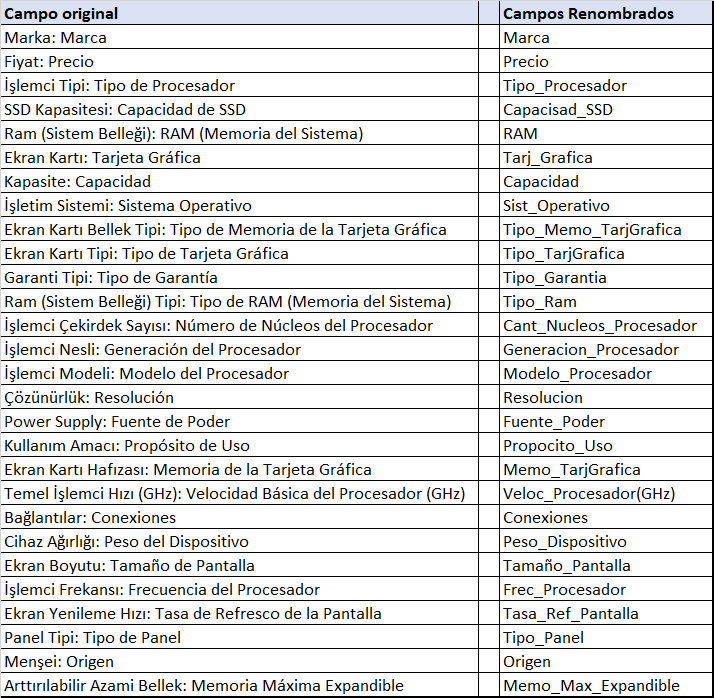

### C. Renombre de Variables

In [3]:
df.columns.tolist()

['Marka',
 'Fiyat',
 'İşlemci Tipi',
 'SSD Kapasitesi',
 'Ram (Sistem Belleği)',
 'Ekran Kartı',
 'Kapasite',
 'İşletim Sistemi',
 'Ekran Kartı Bellek Tipi',
 'Ekran Kartı Tipi',
 'Garanti Tipi',
 'Ram (Sistem Belleği) Tipi',
 'İşlemci Çekirdek Sayısı',
 'İşlemci Nesli',
 'İşlemci Modeli',
 'Çözünürlük',
 'Power Supply',
 'Kullanım Amacı',
 'Ekran Kartı Hafızası',
 'Temel İşlemci Hızı (GHz)',
 'Bağlantılar',
 'Cihaz Ağırlığı',
 'Ekran Boyutu',
 'İşlemci Frekansı',
 'Ekran Yenileme Hızı',
 'Panel Tipi',
 'Menşei',
 'Arttırılabilir Azami Bellek']

In [4]:
#Para una mayor comprension del dataset, se procedio a traducir el nombre de cada campo al español (se uso IA)

df.rename(columns={
    'Marka': 'Marca',
    'Fiyat': 'Precio',
    'İşlemci Tipi':'Tipo_Procesador',
    'SSD Kapasitesi': 'Capacidad_SSD',
    'Ram (Sistem Belleği)': 'RAM',
    'Ekran Kartı': 'Tarj_Grafica',
    'Kapasite': 'Capacidad',
    'İşletim Sistemi': 'Sist_Operativo',
    'Ekran Kartı Bellek Tipi':'Tipo_Memo_TarjGrafica',
    'Ekran Kartı Tipi':'Tipo_TarjGrafica',
    'Garanti Tipi': 'Tipo_Garantia',
    'Ram (Sistem Belleği) Tipi' : 'Tipo_Ram',
    'İşlemci Çekirdek Sayısı': 'Cant_Nucleos_Procesador',
    'İşlemci Nesli': 'Generacion_Procesador',
    'İşlemci Modeli':'Modelo_Procesador',
    'Çözünürlük':'Resolucion',
    'Power Supply':'Fuente_Poder',
    'Kullanım Amacı':'Proposito_Uso',
    'Ekran Kartı Hafızası':'Memo_TarjGrafica',
    'Temel İşlemci Hızı (GHz)':'Veloc_Procesador(GHz)',
    'Bağlantılar':'Conexiones',
    'Cihaz Ağırlığı':'Peso_Dispositivo',
    'Ekran Boyutu':'Tamaño_Pantalla',
    'İşlemci Frekansı':'Frec_Procesador',
    'Ekran Yenileme Hızı':'Tasa_Ref_Pantalla',
    'Panel Tipi':'Tipo_Panel',
    'Menşei':'Origen',
    'Arttırılabilir Azami Bellek':'Memo_Max_Expandible'
}, inplace=True)

df

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Fuente_Poder,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Peso_Dispositivo,Tamaño_Pantalla,Frec_Procesador,Tasa_Ref_Pantalla,Tipo_Panel,Origen,Memo_Max_Expandible
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3. Nesil,3470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3. Nesil,İ5-3470,1920 x 1080,350 - 500 W,Oyun,4 GB ve altı,3.2,HDMI,Belirtilmemiş,24 inç,3.00 GHz üstü,75 Hz,NaN,NaN,NaN
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4. Nesil,4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DMC,20799.00,Intel Core i5,256 GB,32 GB,AMD Radeon RX 580,256 GB,Windows,GDDR5,Harici,Resmi Distribütör Garantili,DDR4,6,Belirtilmemiş,9400F,1920 x 1080,350 - 500 W,Oyun,8 GB,2.9,HDMI,Belirtilmemiş,"24"" / 61 Ekran",NaN,165 Hz,VA,TR,NaN
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4. Nesil,4590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,Paylaşımlı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13. Nesil,13700,NaN,NaN,Ofis - İş,4 GB ve altı,1.5,USB,NaN,NaN,NaN,NaN,NaN,NaN,64 GB


### D. Eliminacion de duplicados

In [5]:
# Muestra la cantidad de registros duplicados

duplicados = df.duplicated()
print(f"Duplicados  encontrados: {duplicados.sum()}")

Duplicados  encontrados: 1


In [6]:
# Elimina los registro duplicados

df = df.drop_duplicates()
print(f"Data despues de eliminar duplicados: {len(df)} filas")

Data despues de eliminar duplicados: 2466 filas


### E. Análisis de datos faltantes por columnas

In [7]:
#Muestra la cantidad de NULL que presenta cada columna, ordenados en orden ascendente

df.isnull().sum().sort_values(ascending=True)

,0
Marca,0
Precio,0
Tipo_Garantia,4
Tipo_Procesador,5
Sist_Operativo,5
Capacidad,5
Tarj_Grafica,5
Tipo_Memo_TarjGrafica,6
Modelo_Procesador,10
Generacion_Procesador,18


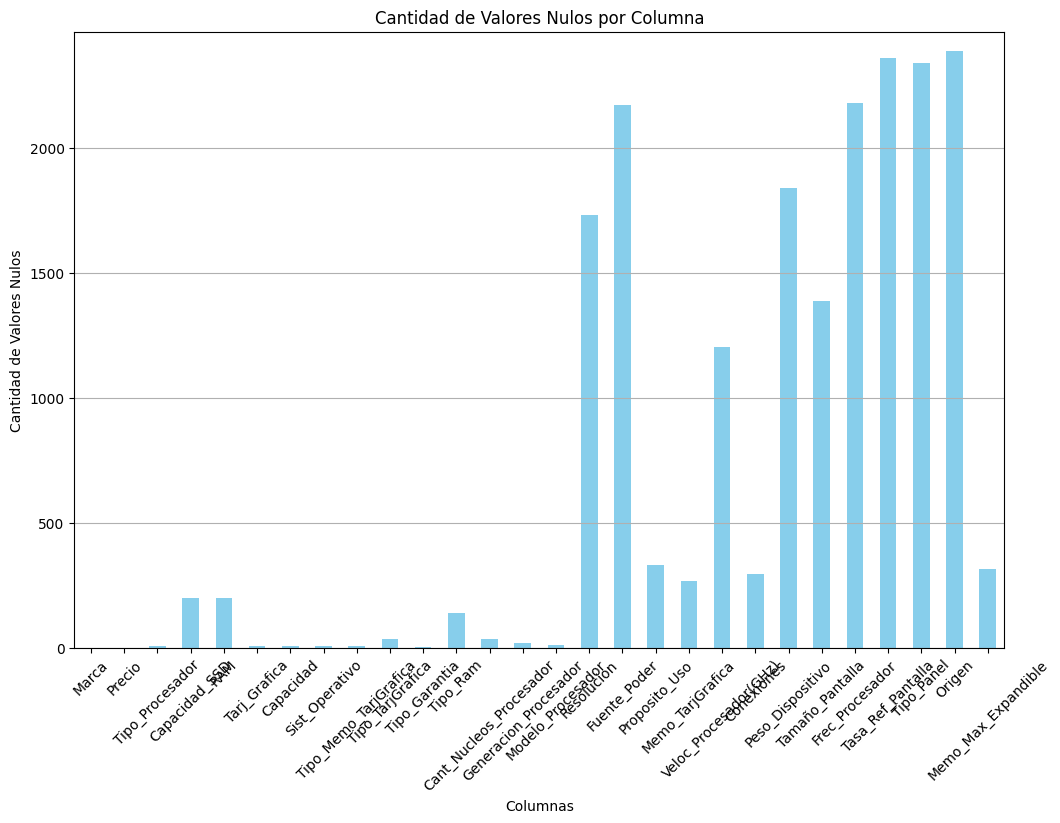

In [8]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando las columnas que deseas mostrar
columns_to_plot = [
    'Marca', 'Precio', 'Tipo_Procesador', 'Capacidad_SSD',
    'RAM', 'Tarj_Grafica', 'Capacidad', 'Sist_Operativo',
    'Tipo_Memo_TarjGrafica', 'Tipo_TarjGrafica', 'Tipo_Garantia',
    'Tipo_Ram', 'Cant_Nucleos_Procesador', 'Generacion_Procesador',
    'Modelo_Procesador', 'Resolucion', 'Fuente_Poder',
    'Proposito_Uso', 'Memo_TarjGrafica', 'Veloc_Procesador(GHz)',
    'Conexiones', 'Peso_Dispositivo', 'Tamaño_Pantalla',
    'Frec_Procesador', 'Tasa_Ref_Pantalla', 'Tipo_Panel',
    'Origen', 'Memo_Max_Expandible'
]

# Filtra las cuentas de nulos para las columnas específicas
null_counts_filtered = null_counts[columns_to_plot]

# Grafica
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Ajusta los límites del eje x para que reflejen el total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

En este grafico de barras se puede observar de una manera visual, la insidencia de valores nulos en cada variable del dataframe.

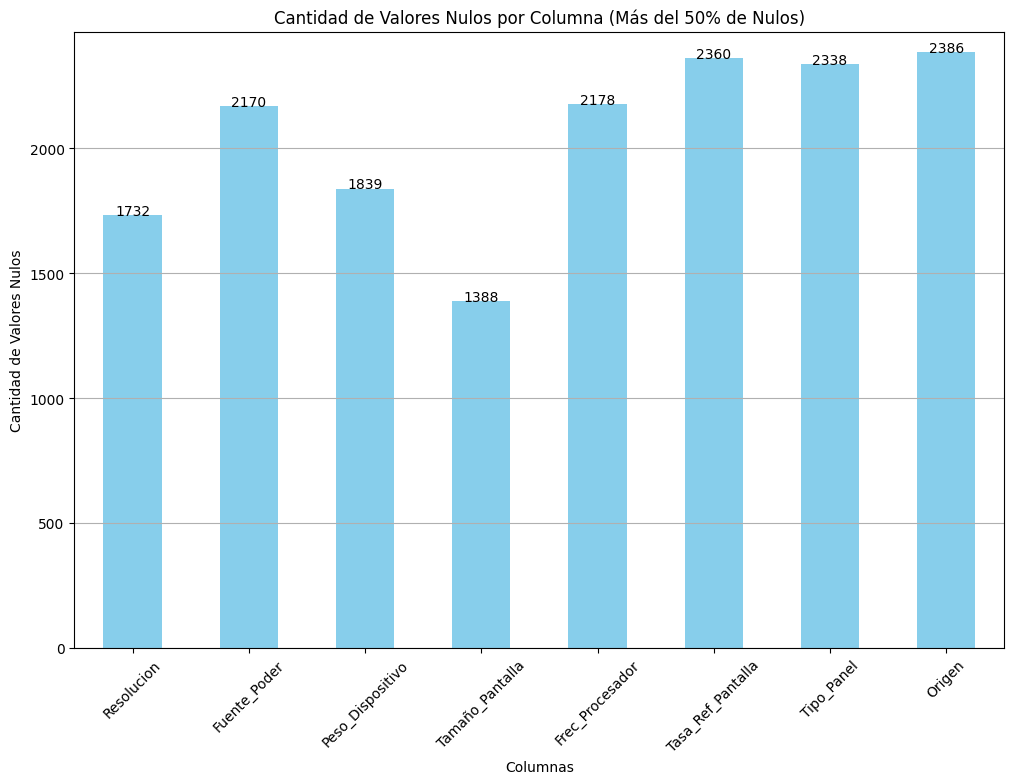

In [9]:
# Calculando la cantidad de valores nulos y el total de registros
null_counts = df.isnull().sum()
total_records = len(df)

# Filtrando solo las columnas que tienen más del 50% de nulos
threshold = total_records * 0.5
null_counts_filtered = null_counts[null_counts > threshold]

# Grafico
plt.figure(figsize=(12, 8))
ax = null_counts_filtered.plot(kind='bar', color='skyblue')

# Establecer el límite del eje y igual al total de registros del DataFrame
ax.set_ylim(0, total_records)

# Establecer el título, etiquetas y añadir cuadrícula
plt.title('Cantidad de Valores Nulos por Columna (Más del 50% de Nulos)')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de Valores Nulos')

# Añadiendo el número de nulos sobre cada barra
for i in range(len(null_counts_filtered)):
    ax.text(i, null_counts_filtered.iloc[i] + 0.1, f'{null_counts_filtered.iloc[i]}', ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()




De acuerdo a lo encontrado en el grafico podemos considerar lo siguiente se podrian eliminar las columnas origen, tipo_panel, tasa_ref_pantalla, frec_procesador, fuente_poder, peso_Dispositivo por el alto numero de valores nulos que presentan estas columnas

####  Eliminacion de Variables

In [10]:
# se eliminaran las columnas con un alto nivel de valores nulos   "NOTA PARA TENER EN CUENTA: JUSTIFICAR EL PORQUE SE ELIMINA CADA CAMPO"
# Eliminar las columnas especificadas
columns_to_remove = [
    'Fuente_Poder',
    'Peso_Dispositivo',
    'Tamaño_Pantalla',
    'Frec_Procesador',
    'Tasa_Ref_Pantalla',
    'Tipo_Panel',
    'Origen'
]

df.drop(columns=columns_to_remove, inplace=True)

# Verificación de las columnas restantes en el DataFrame


/tmp/ipython-input-10-3397108173.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_remove, inplace=True)


### F. Análisis de datos faltantes por Filas

In [11]:
# Se muestra los registros a traves de sus indeces que mas valores nulos presentan, ordenados de forma descendente

df.isnull().sum(axis=1).sort_values(ascending=False).head(20)

,0
414,19
351,18
96,17
5,16
396,12
453,12
291,12
15,12
600,12
323,12


In [12]:
# Muestra los registros que tienen  16 o mas campos con valores nulos
df[df.isnull().sum(axis=1) >=16].reset_index()

,index,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Memo_Max_Expandible
0,5,Zeiron,13184.00,NaN,256 GB,NaN,NaN,1 TB,NaN,NaN,NaN,Zeiron TÃ¼rkiye Garantili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96,Apple,59399.01,NaN,NaN,NaN,NaN,Yok,NaN,NaN,NaN,Apple TÃ¼rkiye Garantili,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,351,Quadro,5450.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4460,NaN,NaN,NaN,NaN,NaN,NaN
3,414,HP,28334.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Eliminacion de Registros con un alto indice de valores nulos.

In [13]:
# Se procede a eliminar los registros con un alto indice de valores nulos en sus columnas (condicion de eliminacion 16 o mas columnas vacias)

df.drop(index=df[df.isnull().sum(axis=1) >=16].index, inplace=True)

/tmp/ipython-input-13-1480125493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df[df.isnull().sum(axis=1) >=16].index, inplace=True)


### G. Metodologia para tratar los Nan

Una Vez que se identifico las filas y columnas con un alto grado de NaN, se procedio a eliminarlas. Ahora el proximo paso es evaluar las columnas restantes y definir una metodologia para tratar los valores nulos de las mismas.

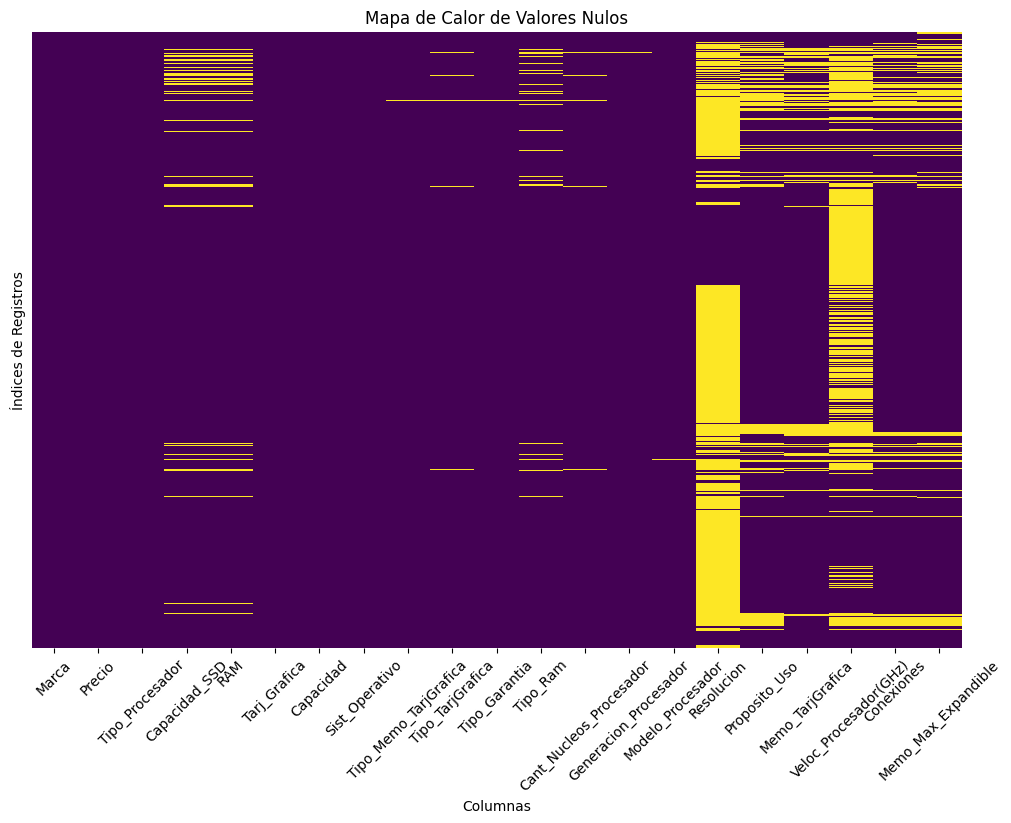

In [14]:
# gráfico de calor que muestre visualmente la presencia de valores nulos en tu DataFrame
#Crear un DataFrame que marque los valores nulos como True
null_heatmap = df.isnull()

# Crear el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Índices de Registros')
plt.xticks(ticks=np.arange(len(null_heatmap.columns)) + 0.5, labels=null_heatmap.columns, rotation=45)
plt.show()

Para reemplazar los NaN que todavian quedan en el DataFrame procederemos de la siguiente forma:
  1. Usando la columna Tipo_Procesador y Generacion_Procesador usaremos la tabla externa "procesador.txt" la cual posee las caracteristicas de cada procesador de acuerdo a su generarcion.

  2 . Usando la columna Tarj_Grafica usaremos la tabla externa "Tarjeta_Grafica.csv", la cual posee las caracteristicas de cada tarjeta grafica del dataset.

#### Reemplazo de NaN usando los campos Tipo_Procesador y Generacion_Procesador

In [15]:
df['Tipo_Procesador'].value_counts().reset_index()

,Tipo_Procesador,count
0,Intel Core i5,1538
1,Intel Core i3,411
2,Intel Core i7,379
3,AMD Ryzen 3,79
4,AMD Ryzen 5,15
5,Intel Xeon,12
6,AMD Ryzen 9,7
7,AMD Ryzen 7,5
8,Intel Pentium,5
9,Intel Core i9,4


In [16]:
df['Generacion_Procesador'] = df['Generacion_Procesador'].str.extract(r'(\d+)')
df['Generacion_Procesador'].value_counts().reset_index()

/tmp/ipython-input-16-2660409006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Generacion_Procesador'] = df['Generacion_Procesador'].str.extract(r'(\d+)')


,Generacion_Procesador,count
0,12,1256
1,13,706
2,5,98
3,3,83
4,4,50
5,1,43
6,2,41
7,14,33
8,6,28
9,7,27


In [17]:
#Se carga el archivo "procesador.txt" en un DataFrame llamado df_procesador

# Leer el archivo .txt separado por comas
df_procesador = pd.read_csv('https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/main/procesador.txt', delimiter='\t')

# Mostrar las primeras filas del DataFrame
print(df_procesador.head())

  Tipo_Procesador Cantidad_Nucleos        Modelo Velocidad_Procesador Generacion_Procesador Tipo_RAM
0     AMD Ryzen 3                4  Ryzen 3 1200     3.1 (Turbo: 3.4)                     1     DDR4
1     AMD Ryzen 3                4  Ryzen 3 3100     3.6 (Turbo: 3.9)                     3     DDR4
2     AMD Ryzen 3                4  Ryzen 3 4100     3.8 (Turbo: 4.0)                     5     DDR4
3     AMD Ryzen 5                6  Ryzen 5 1600     3.2 (Turbo: 3.6)                     1     DDR4
4     AMD Ryzen 5                6  Ryzen 5 3600     3.6 (Turbo: 4.2)                     3     DDR4


In [18]:
df_procesador

,Tipo_Procesador,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Generacion_Procesador,Tipo_RAM
0,AMD Ryzen 3,4,Ryzen 3 1200,3.1 (Turbo: 3.4),1,DDR4
1,AMD Ryzen 3,4,Ryzen 3 3100,3.6 (Turbo: 3.9),3,DDR4
2,AMD Ryzen 3,4,Ryzen 3 4100,3.8 (Turbo: 4.0),5,DDR4
3,AMD Ryzen 5,6,Ryzen 5 1600,3.2 (Turbo: 3.6),1,DDR4
4,AMD Ryzen 5,6,Ryzen 5 3600,3.6 (Turbo: 4.2),3,DDR4
...,...,...,...,...,...,...
70,Intel Xeon,8,13700,3.5 GHz,13,DDR4
71,Intel Xeon,NaN,Belirtilmemi?,NaN,NaN,NaN
72,Intel Xeon,NaN,Belirtilmemi?,NaN,NaN,NaN
73,Intel Xeon,16,E52683,2.6 GHz,4,DDR4


In [19]:
# se realiza un join entre los dataframe df y df_procesador, usando como condicion los campos 'Tipo_Procesador','Generacion_Procesador' guardando  esta union en un nueno dataframe

df_Join_Procesador = df.join(df_procesador.set_index(['Tipo_Procesador','Generacion_Procesador']),on=['Tipo_Procesador','Generacion_Procesador'],how='inner')


In [20]:
df_Join_Procesador

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3,3470,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-3570,3.4,DDR3
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Oyun,4 GB ve altı,3.2,HDMI,NaN,4,i5-3570,3.4,DDR3
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,500 GB,Windows,Dahili,Dahili,Zeiron Türkiye Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Ofis - İş,Paylaşımlı,3.2,HDMI,16 GB,4,i5-3570,3.4,DDR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,Paylaşımlı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5


#### Reemplazo de NaN usando el campo Tarj_Grafica|

In [21]:
# Listado de cada tipo de Tarjeta Grafica
df['Tarj_Grafica'].value_counts().reset_index()

,Tarj_Grafica,count
0,AMD Radeon RX550,483
1,Nvidia GeForce GT 730,446
2,Dahili Ekran Kartı,360
3,NVIDIA GeForce GT1030,346
4,Nvidia GeForce GTX 1650,260
5,Intel HD Graphics,201
6,Intel UHD Graphics 770,63
7,AMD Radeon RX 550,60
8,Intel UHD Graphics 730,54
9,AMD Radeon Graphics,30


In [22]:
#Se carga el archivo "Tarjeta_Grafica.csv" en un DataFrame llamado df_Grafica

# Leer el archivo .txt separado por comas
df_Grafica = pd.read_csv('https://github.com/Jorge-Alvarez-23/Data-Science-II_Coder/raw/main/Tarjeta_Grafica.csv', delimiter=',')  # Cambia 'ruta/al/archivo.txt' por la ruta real

# Mostrar las primeras filas del DataFrame
print(df_Grafica.head())

              Tarj_Grafica Tipo_TarjGrafica TipoMemoGrafica                   MemorTarjGrafica      Resolucion_Max                        Conexiones
0         AMD Radeon RX550         Dedicada           GDDR5                                4GB         4096 x 2160            DisplayPort, HDMI, DVI
1    Nvidia GeForce GT 730         Dedicada    GDDR5 / DDR3                                2GB         4096 x 2160                    HDMI, DVI, VGA
2       Dahili Ekran Kartı        Integrada      Compartida  Compartida con la RAM del sistema  Varía según la CPU  Varía según la placa madre y CPU
3    NVIDIA GeForce GT1030         Dedicada           GDDR5                                2GB         7680 x 4320         HDMI, DisplayPort (o DVI)
4  Nvidia GeForce GTX 1650         Dedicada   GDDR5 / GDDR6                                4GB         7680 x 4320            DisplayPort, HDMI, DVI


In [23]:
df_Grafica

,Tarj_Grafica,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGrafica,Resolucion_Max,Conexiones
0,AMD Radeon RX550,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,Nvidia GeForce GT 730,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,Dahili Ekran Kartı,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
3,NVIDIA GeForce GT1030,Dedicada,GDDR5,2GB,7680 x 4320,"HDMI, DisplayPort (o DVI)"
4,Nvidia GeForce GTX 1650,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
5,Intel HD Graphics,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
6,Intel UHD Graphics 770,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
7,AMD Radeon RX 550,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
8,Intel UHD Graphics 730,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
9,AMD Radeon Graphics,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU


In [24]:
# se realiza un join entre los dataframe df_Join_Procesador y df_Grafica, usando como condicion el campo Tarj_Grafica, guardando  esta union en un nueno dataframe

df_Join = df_Join_Procesador.join(df_Grafica.set_index('Tarj_Grafica'),on= 'Tarj_Grafica',how='inner',lsuffix='_left')

In [25]:
df_Join

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Capacidad,Sist_Operativo,Tipo_Memo_TarjGrafica,Tipo_TarjGrafica_left,Tipo_Garantia,Tipo_Ram,Cant_Nucleos_Procesador,Generacion_Procesador,Modelo_Procesador,Resolucion,Proposito_Uso,Memo_TarjGrafica,Veloc_Procesador(GHz),Conexiones_left,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGrafica,Resolucion_Max,Conexiones
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,3,3470,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Yok,Windows,DDR3,Harici,Resmi Distribütör Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Oyun,4 GB ve altı,3.2,HDMI,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,8GB,7680 x 4320,"DisplayPort, HDMI, DVI"
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,512 GB,Free Dos (İşletim Sistemi Yok),GDDR5,Harici,Resmi Distribütör Garantili,DDR3,4,4,4590,NaN,NaN,NaN,NaN,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,500 GB,Windows,Dahili,Dahili,Zeiron Türkiye Garantili,DDR3,4,3,İ5-3470,1920 x 1080,Ofis - İş,Paylaşımlı,3.2,HDMI,16 GB,4,i5-3570,3.4,DDR3,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Yok,Windows,GDDR6,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Yok,Windows,Dahili,Dahili,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,Paylaşımlı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Yok,Windows,DDR3,Harici,HP Türkiye Garantili,DDR4,24,13,13700,NaN,Ofis - İş,4 GB ve altı,1.5,USB,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"


Como ultimo paso para definir el dataframe del proyecto, procederemos a copiar en un nuevo dataframe (df_Proy) los campos con la informacion obtenida de los join anteriores.

In [26]:
df_Proy = df_Join[['Marca','Precio','Tipo_Procesador','Capacidad_SSD','RAM','Tarj_Grafica','Sist_Operativo','Tipo_Garantia','Generacion_Procesador','Proposito_Uso','Memo_Max_Expandible','Cantidad_Nucleos','Modelo','Velocidad_Procesador','Tipo_RAM','Tipo_TarjGrafica','TipoMemoGrafica','MemorTarjGrafica','Resolucion_Max','Conexiones']].copy()

In [27]:
df_Proy

,Marca,Precio,Tipo_Procesador,Capacidad_SSD,RAM,Tarj_Grafica,Sist_Operativo,Tipo_Garantia,Generacion_Procesador,Proposito_Uso,Memo_Max_Expandible,Cantidad_Nucleos,Modelo,Velocidad_Procesador,Tipo_RAM,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGrafica,Resolucion_Max,Conexiones
0,XASER,13716.90,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,3,NaN,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
1,DMC,13678.00,Intel Core i5,512 GB,16 GB,Nvidia Geforce GT 740,Windows,Resmi Distribütör Garantili,3,Oyun,NaN,4,i5-3570,3.4,DDR3,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2,XASER,12857.74,Intel Core i5,512 GB,16 GB,AMD Radeon RX 580,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,4,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,8GB,7680 x 4320,"DisplayPort, HDMI, DVI"
4,XASER,12834.62,Intel Core i5,512 GB,16 GB,AMD Radeon RX 550,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,4,NaN,NaN,4,i5-4670,3.4,DDR3,Dedicada,GDDR5,4GB,4096 x 2160,"DisplayPort, HDMI, DVI"
7,Zeiron,8909.01,Intel Core i5,256 GB,16 GB,Intel HD Graphics,Windows,Zeiron Türkiye Garantili,3,Ofis - İş,16 GB,4,i5-3570,3.4,DDR3,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,HP,42606.03,Intel Core i7,1 TB,64 GB,Nvidia GeForce GT 730,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
2463,HP,51946.97,Intel Core i7,2 TB,64 GB,Nvidia GeForce GTX 1650,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
2464,HP,43954.05,Intel Core i7,4 TB,12 GB,Dahili Ekran Kartı,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
2465,HP,43963.48,Intel Core i7,2 TB,48 GB,Nvidia GeForce GT 730,Windows,HP Türkiye Garantili,13,Ofis - İş,64 GB,16,i7-13700K,3.4 (Turbo: 5.4),DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"


In [28]:
#Mostramos el estado con respecto a NaN del dataframe resultante

df_Proy.isnull().sum().reset_index()

,index,0
0,Marca,0
1,Precio,0
2,Tipo_Procesador,0
3,Capacidad_SSD,177
4,RAM,177
5,Tarj_Grafica,0
6,Sist_Operativo,0
7,Tipo_Garantia,1
8,Generacion_Procesador,0
9,Proposito_Uso,284


#### Analisis por columnas y conversion de tipo de datos

Analisis de la columna Capacidad_SSD

En esta columna encontramos que hay 177 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana,  se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [29]:
df_Proy['Capacidad_SSD'].value_counts().reset_index()

,Capacidad_SSD,count
0,4 TB,578
1,256 GB,407
2,1 TB,391
3,2 TB,378
4,512 GB,373
5,128 GB,17
6,500 GB,10
7,240 GB,10
8,480 GB,3
9,250 GB,2


In [30]:
# Se Elimina la unidad "GB"
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace(' GB', '')

# Se elimina la unidad "TB" y se unifica el valor del dato a GB, se completa con 000
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace(' TB', '000')

# Se Convierte el valor "SSD YOK" al valor cero "0"
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].str.replace('SSD Yok', '0')

# Para poder hace el cambio del tipo de dato
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].fillna(0)
df_Proy['Capacidad_SSD'] = df_Proy['Capacidad_SSD'].astype('int32')

# Se renombre el campo para especificar la unidad del  campo (GB)
df_Proy.rename(columns={'Capacidad_SSD': 'Capacidad_SSD_GB'}, inplace=True)

Imputacion de los valores faltantes de la columna  Capacidad_SDD usando la mediana

In [31]:
# Se reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['Capacidad_SSD_GB'] != 0]['Capacidad_SSD_GB'].median()

# 2. Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['Capacidad_SSD_GB'] = df_Proy['Capacidad_SSD_GB'].replace(0, median_capacidad).astype('int32')

In [32]:
df_Proy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 0 to 2466
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Marca                  2350 non-null   object 
 1   Precio                 2350 non-null   float64
 2   Tipo_Procesador        2350 non-null   object 
 3   Capacidad_SSD_GB       2350 non-null   int32  
 4   RAM                    2173 non-null   object 
 5   Tarj_Grafica           2350 non-null   object 
 6   Sist_Operativo         2350 non-null   object 
 7   Tipo_Garantia          2349 non-null   object 
 8   Generacion_Procesador  2350 non-null   object 
 9   Proposito_Uso          2066 non-null   object 
 10  Memo_Max_Expandible    2097 non-null   object 
 11  Cantidad_Nucleos       2350 non-null   object 
 12  Modelo                 2350 non-null   object 
 13  Velocidad_Procesador   2350 non-null   object 
 14  Tipo_RAM               2350 non-null   object 
 15  Tipo_Tarj

Analisis de la columna RAM

En esta columna encontramos que hay 177 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [33]:

df_Proy['RAM'].value_counts().reset_index()

,RAM,count
0,16 GB,343
1,32 GB,239
2,8 GB,235
3,64 GB,225
4,48 GB,213
5,20 GB,196
6,24 GB,196
7,36 GB,185
8,40 GB,184
9,12 GB,150


In [34]:
df_Proy['RAM'] = df_Proy['RAM'].str.replace(' GB', '')
df_Proy['RAM'] = df_Proy['RAM'].str.replace(' TB', '000')
df_Proy['RAM'] = df_Proy['RAM'].fillna(0)
df_Proy['RAM'] = df_Proy['RAM'].astype('int32')
df_Proy.rename(columns={'RAM': 'RAM_GB'}, inplace=True)

In [35]:
df_Proy['RAM_GB'].describe()

,RAM_GB
count,2350.000000
mean,27.571064
std,18.507436
min,0.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,128.000000


In [36]:
# Se Reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['RAM_GB'] != 0]['RAM_GB'].median()

# Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['RAM_GB'] = df_Proy['RAM_GB'].replace(0, median_capacidad).astype('int32')

Analisis de la columna Memo_Max_Expandible

En esta columna encontramos que hay 253 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [37]:
df_Proy['Memo_Max_Expandible'].value_counts().reset_index()

,Memo_Max_Expandible,count
0,64 GB,1892
1,16 GB,136
2,32 GB,37
3,8 GB,28
4,128 GB,3
5,256 GB,1


In [38]:
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].str.replace(' GB', '')
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].str.replace(' TB', '000')
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].fillna(0)
df_Proy['Memo_Max_Expandible'] = df_Proy['Memo_Max_Expandible'].astype('int32')
df_Proy.rename(columns={'Memo_Max_Expandible': 'Memo_Max_Expandible_GB'}, inplace=True)

In [39]:
# Se Reemplaza con la mediana

median_capacidad = df_Proy[df_Proy['Memo_Max_Expandible_GB'] != 0]['Memo_Max_Expandible_GB'].median()

# Reemplazar solo los ceros (que eran NaN) con la mediana:
df_Proy['Memo_Max_Expandible_GB'] = df_Proy['Memo_Max_Expandible_GB'].replace(0, median_capacidad).astype('int32')

Analisis de la columna Generacion_Procesador

En esta columna encontramos que hay 253 valores NaN, ya que se desconoce el motivo que lleva a esta falta de valores se procede a imputar por la mediana, se procede a unificar la unidad de medida y a eliminar la unidad del dato.

In [40]:
df_Proy['Generacion_Procesador'].value_counts().reset_index()

,Generacion_Procesador,count
0,12,1256
1,13,683
2,5,103
3,3,83
4,4,50
5,1,43
6,2,41
7,6,28
8,7,19
9,10,14


In [41]:
df_Proy['Generacion_Procesador'] = df_Proy['Generacion_Procesador'].astype('int32')

Analisis de la columna Cantidad_Nucleos

En esta columna algunos de los registros presentaban aparte de la cantidad de nucleos la cantidad de hilos de procesamiento se elimino esa informacion dejando solo la referente a los nucleos y se convirtio el tipo de dato object  a int32



In [42]:
df_Proy['Cantidad_Nucleos'].value_counts().reset_index()

,Cantidad_Nucleos,count
0,6,1355
1,4,592
2,16,152
3,12,136
4,4/8 (HT),50
5,2/4 (Hyper-Threading),22
6,2/4 (HT),19
7,2,15
8,8,5
9,8/16 (HT),2


In [43]:
df_Proy['Cantidad_Nucleos'] = df_Proy['Cantidad_Nucleos'].str.split('/').str[0]
df_Proy['Cantidad_Nucleos'] = df_Proy['Cantidad_Nucleos'].astype('int32')

Analisis de la columna Velocidad_Procesador

En esta columna algunos de los registros presentaban la velocidad max que prodria alcanzar el procesador en determinados momentos se elimino esa informacion dejando solo la referente a la velocidad base y se convirtio el tipo de dato object  a float

In [44]:
df_Proy['Velocidad_Procesador'].value_counts().reset_index()

,Velocidad_Procesador,count
0,2.5 (Turbo: 4.4),780
1,2.5 (Turbo: 4.6),532
2,3.3 (Turbo: 4.3),346
3,3.4 (Turbo: 5.4),148
4,2.1 (Turbo: 4.9),130
5,3.4,125
6,3.8 (Turbo: 4.0),79
7,3.3,45
8,2.67,33
9,3.6,22


In [45]:
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].str.split('(').str[0]
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].str.replace(' GHz', '')
df_Proy['Velocidad_Procesador'] = df_Proy['Velocidad_Procesador'].astype('float')

#Se renombra el campo para Agregar la unidad (GHz)
df_Proy.rename(columns={'Velocidad_Procesador': 'Velocidad_Procesador_GHz'}, inplace=True)

Grafico de calor que muestra visualmente como quedo el dataframe despues de reeplazar los NaN.

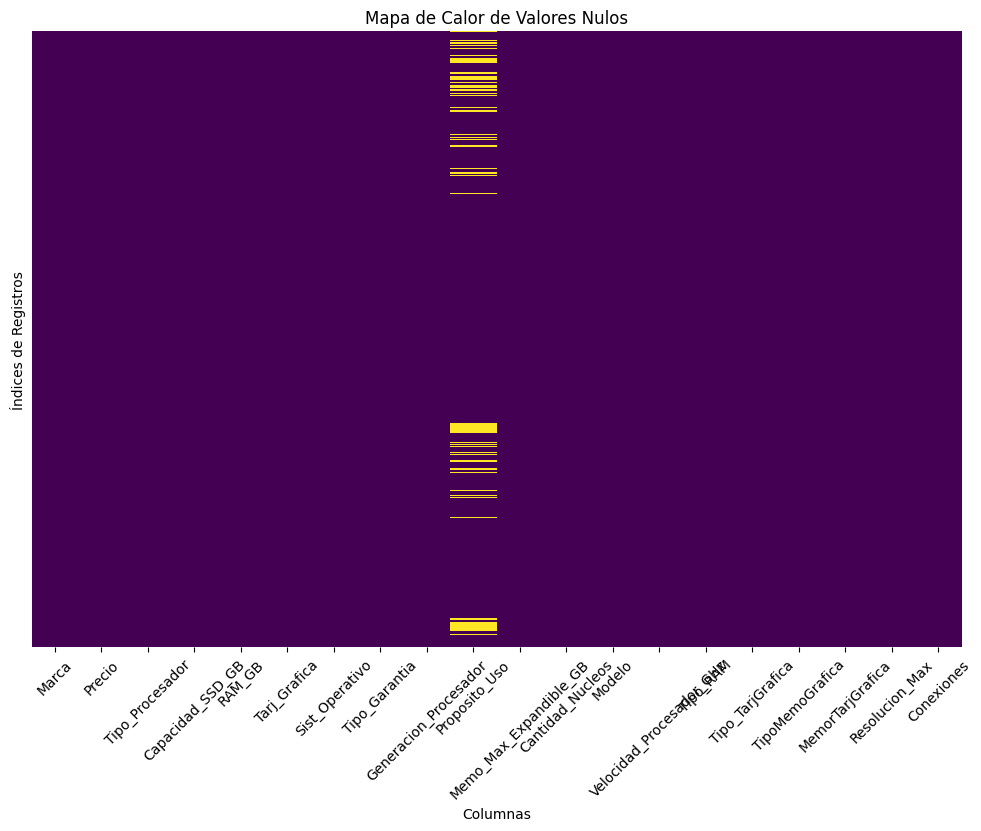

In [46]:
# gráfico de calor que muestre visualmente la presencia de valores nulos en tu DataFrame
#Crear un DataFrame que marque los valores nulos como True
null_heatmap = df_Proy.isnull()

# Crea el gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(null_heatmap, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Mapa de Calor de Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Índices de Registros')
plt.xticks(ticks=np.arange(len(null_heatmap.columns)) + 0.5, labels=null_heatmap.columns, rotation=45)
plt.show()

# 5- Análisis exploratorio de los datos

### 5.A Análisis Univariado

##### Analisis Variable PRECIO (Target)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000., 225000.]),
 [Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000'),
  Text(225000.0, 0, '225000')])

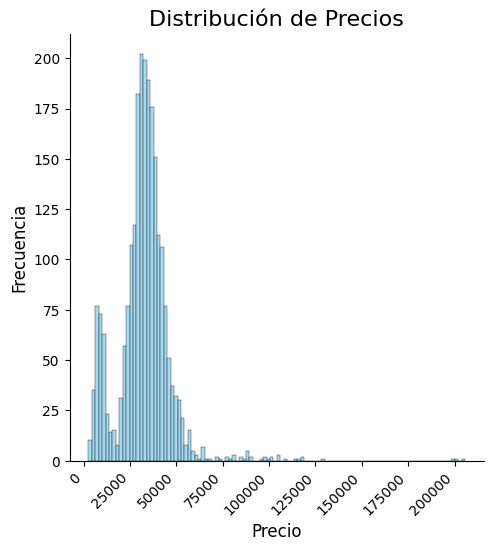

In [47]:
sns.displot(df_Proy['Precio'], color='skyblue', edgecolor='black')
plt.title('Distribución de Precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')

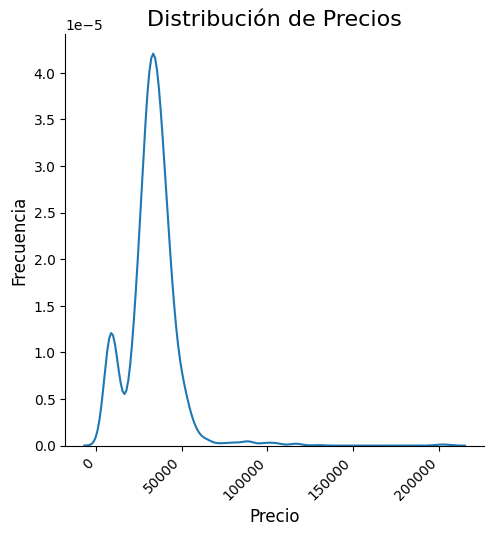

In [48]:
sns.displot(df_Proy['Precio'], kind='kde')
plt.title('Distribución de Precios', fontsize=16)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

###### Conclusion

La forma de la distribucion presenta un sesgo hacia la izquierda y presenta multiples picos. Podemos observar que los precios representados en el eje X comienzan en 0 y se extienden hasta aproximadamente 200000. En el eje Y se muestra cuantas veces aparece un precio dentro de un rango especifico.

De acuerdo al grafico podemos observar:

Pico Principal: entre los 30000 y 40000 se encuentra un pico pronunciado, lo que se interpreta que el conjunto de datos en su mayoria tiene precios en ese rango.

Segundo Pico: este pico algo menor, se encuentra entre los 5000 y 15000, por lo que se podria decir que en este rango se encuentra una cantidad importante de observaciones
Asimetria: Se observa una cola que se extiende hacia la derecha (precios mayores), aunque la mayoria de los precios se encuentran entre los rangos mas bajos, existen algunos precios mucho mas altos que los mas frecuentes.

##### Analisis Variable MARCA

Text(0.5, 0, 'Marca')

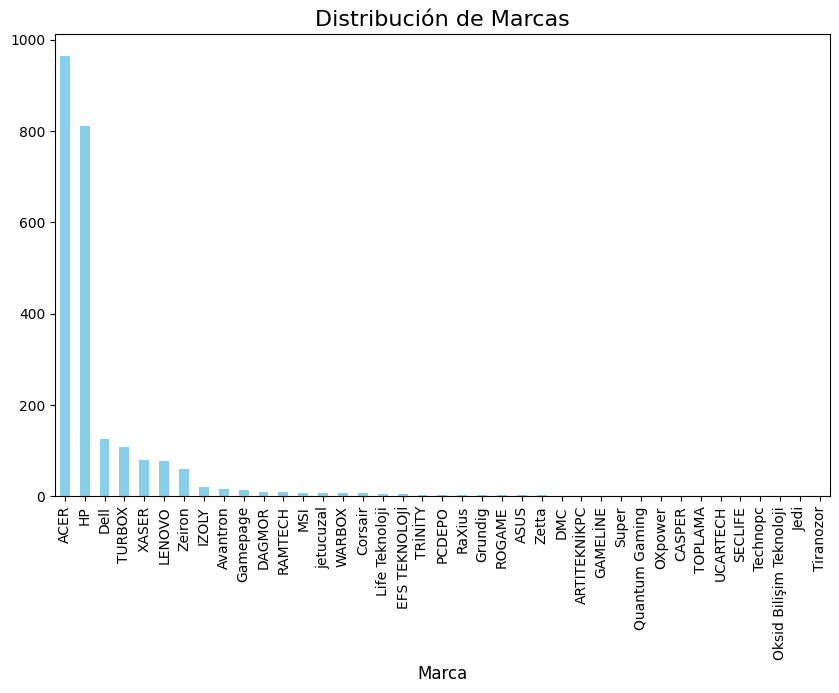

In [49]:
plt.figure(figsize=(10, 6))
df_Proy['Marca'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Marcas', fontsize=16)
plt.xlabel('Marca', fontsize=12)

###### Conclusion

Haciendo un analisis por MARCA podermos concluir lo siguiente:

La marca "ACER" es la mayoritaria en el conjunto de datos.
La marca "HP" también tiene una presencia significativa, aunque mucho menos frecuente que "ACER".
Varias marcas como "Dell", "TURBOX", "XASER", "LENOVO", etc tienen una presencia moderada.
Una gran cantidad de marcas aparecen con muy poca frecuencia.

### 5.B Análisis Bivariado

/tmp/ipython-input-50-2134430252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marca', y='Precio', data=df_Proy, palette='viridis')


Text(0, 0.5, 'Precio')

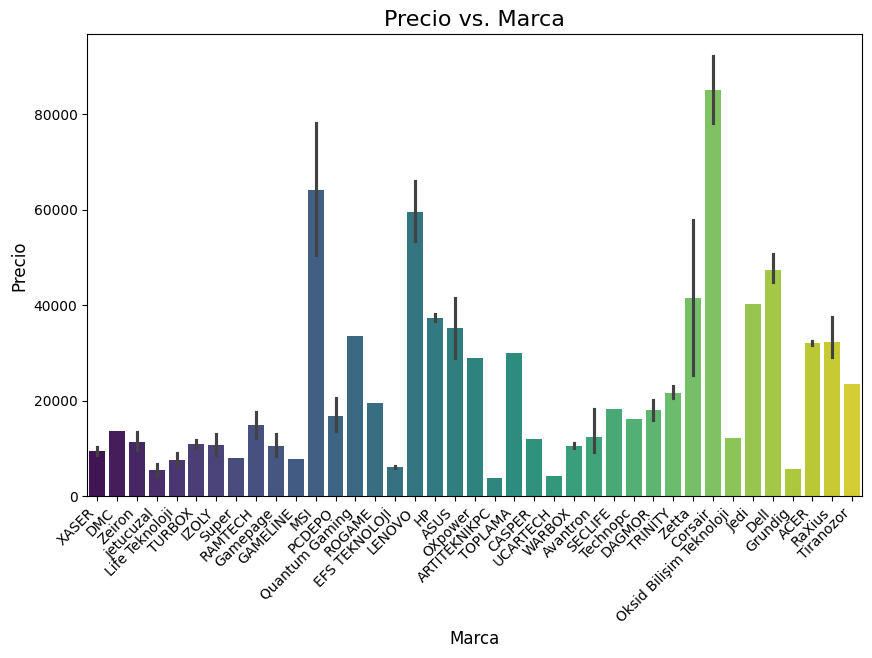

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Marca', y='Precio', data=df_Proy, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precio vs. Marca', fontsize=16)
plt.xlabel('Marca', fontsize=12)
plt.ylabel('Precio', fontsize=12)


#### Conclusion


Este grafico esta mostrando la comparacion del precio promedio de diferentes marcas, como asi tambien la dispercion de los precios dentro de cada marca. Se puede identicar que marcas tienden a ser mas caras o mas baratas y cuales tienden a tener una gama de precios mas amplias.

Por ejemplo:

Las Marcas MSI, Lenovo, Zerra, Corsair, Dell son las marcas con el precio promedio mas alto, pero presentan una variabilidad considerables en sus precios - barras de error relativamente largas -


### 5.C Análisis Multivariado

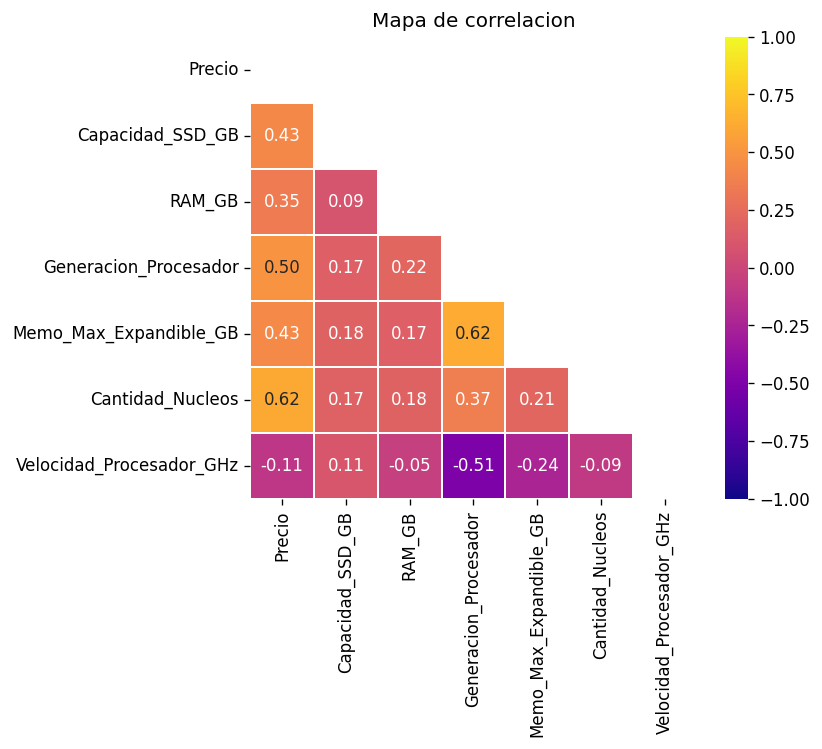

In [51]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))

corr_mat = df_Proy.select_dtypes('number').corr()
mask = np.triu(np.ones_like(corr_mat,dtype = bool))

sns.heatmap(corr_mat,
            mask = mask,
            annot=True,
            fmt = ".2f",
            lw=1,
            cmap = 'plasma',
            vmin=-1,
            vmax=1
            )

plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Mapa de correlacion')
plt.show()

#### Conclusiones

1- Correlación con el Precio:

Cantidad_Nucleos (0.62):Posee una correlación positiva más fuerte con el Precio. Esto nos lleva a decir que las computadoras con más núcleos de procesador tienden a ser más caras.

Generacion_Procesador (0.50): Posee una correlación positiva moderada con el Precio, por lotanto generaciones de procesadores más nuevas tienden a tener precios más altos.

Capacidad_SSD_GB (0.43) y Memo_Max_Expandible_GB (0.43): Muestran una correlación positiva similar, aunque un poco más débil, con el Precio. Las computadoras con mayor capacidad de SSD y mayor memoria máxima expandible tienden a tener un precio mas elevado.

RAM_GB (0.35): Presenta una correlación positiva más débil con el Precio. Más RAM se asocia con precios más altos, pero la relación no es tan fuerte.

Velocidad_Procesador_GHz (-0.11): Muestra una correlación negativa muy débil con el Precio. Esto nos lleva a decir que no es una caracteristica que influya en el precio de la computadora.



2- Correlación entre Otras Características:

Generacion_Procesador y Velocidad_Procesador_GHz (-0.51): Muestran una correlación negativa moderada. Esto podría indicar que las generaciones de procesadores más nuevas no necesariamente tienen velocidades de reloj más altas.

Memo_Max_Expandible_GB y Generacion_Procesador (0.62): Tienen una correlación positiva moderada, lo que podría sugerir que las generaciones de procesadores más nuevas tienden a admitir más memoria expandible.

Cantidad_Nucleos y Memo_Max_Expandible_GB (0.21): También tienen una correlación positiva, aunque más débil.

# 6- Revision de Variables

## 6.A- Overview

In [52]:
df_Proy.shape

(2350, 20)

In [53]:
df_Proy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2350 entries, 0 to 2466
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Marca                     2350 non-null   object 
 1   Precio                    2350 non-null   float64
 2   Tipo_Procesador           2350 non-null   object 
 3   Capacidad_SSD_GB          2350 non-null   int32  
 4   RAM_GB                    2350 non-null   int32  
 5   Tarj_Grafica              2350 non-null   object 
 6   Sist_Operativo            2350 non-null   object 
 7   Tipo_Garantia             2349 non-null   object 
 8   Generacion_Procesador     2350 non-null   int32  
 9   Proposito_Uso             2066 non-null   object 
 10  Memo_Max_Expandible_GB    2350 non-null   int32  
 11  Cantidad_Nucleos          2350 non-null   int32  
 12  Modelo                    2350 non-null   object 
 13  Velocidad_Procesador_GHz  2350 non-null   float64
 14  Tipo_RAM     

In [54]:
df_Proy.dtypes.value_counts()

,count
object,13
int32,5
float64,2


In [55]:
df_Proy.duplicated().sum()

np.int64(1)

In [56]:
# Eliminar las filas duplicadas
df_Proy.drop_duplicates(inplace=True)
print(f"Data despues de eliminar duplicados: {len(df_Proy)} filas")

Data despues de eliminar duplicados: 2349 filas


En una nueva revision del dataset nos encontramos con 2350 registros entre los cuales se detecto un registro duplicado. Se cuenta con $13$ variables categoricas y $7$ variables numericas, la variable objertivo es "Precio".

Se eliminó el registro duplicado del dataset. El cual quedo con $2349$ reg.

In [57]:
# muestra los valores unicos de las variables categoricas!! --- DEspues considerar si se deja la linea de codigo ---

for column in df_Proy.select_dtypes(exclude=['number']).columns:
    print(f"Valores únicos en la columna '{column}':")
    print(df_Proy[column].value_counts())
    print("\n" + "="*50 + "\n")

Valores únicos en la columna 'Marca':
Marca
ACER                       964
HP                         810
Dell                       124
TURBOX                     107
XASER                       78
LENOVO                      77
Zeiron                      58
IZOLY                       20
Avantron                    15
Gamepage                    13
DAGMOR                      10
RAMTECH                      8
MSI                          7
jetucuzal                    7
WARBOX                       6
Corsair                      6
Life Teknoloji               4
EFS TEKNOLOJİ                4
TRİNİTY                      3
PCDEPO                       3
RaXius                       3
Grundig                      2
ROGAME                       2
ASUS                         2
Zetta                        2
DMC                          1
ARTITEKNİKPC                 1
GAMELİNE                     1
Super                        1
Quantum Gaming               1
OXpower                   

### Estadísticas resumen

In [58]:
# variables categoricas
stats_cate = df_Proy.describe(exclude='number').T
stats_cate['frec_perc'] = (stats_cate['freq'] / len(df_Proy)).round(2)

stats_cate.sort_values('frec_perc', ascending = False)

,count,unique,top,freq,frec_perc
Proposito_Uso,2065,4,Ofis - İş,1961,0.834823
Tipo_RAM,2349,6,DDR4/DDR5,1937,0.824606
Tipo_TarjGrafica,2349,5,Dedicada,1636,0.696467
Tipo_Procesador,2349,9,Intel Core i5,1511,0.643252
Sist_Operativo,2349,5,Windows,1325,0.56407
Resolucion_Max,2349,5,4096 x 2160,992,0.422307
Tipo_Garantia,2348,13,ACER Türkiye Garantili,965,0.410813
Marca,2349,39,ACER,964,0.410387
TipoMemoGrafica,2349,10,GDDR5,886,0.377182
Conexiones,2349,12,"DisplayPort, HDMI, DVI",805,0.342699


**Insights Iniciales sobre Variables Categóricas**

1. **Proposito_Uso **  
   El 83% de las computadoras son para el tipo de "Trabajo / Oficina" (Ofis - İş), el alto porcentaje indica muy poca variabilidad, esta variable tiene valores nulos.

2. **Tipo_RAM
  Presenta un 82% de valores DDR4/DDR5 lo que indica que esta variable tiene muy poca variabilidad y probablemente escasa relevancia predictiva.

3. **Alto porcentaje de valores faltantes en `Alley` (callejón de acceso)**  
   Solo hay 91 valores no nulos (menos del 7%), lo cual puede indicar que la mayoría de las viviendas no tienen callejón trasero. Podría recodificarse como `"NoAlley"` para reflejar la ausencia.

4. **Distribución regular de los lotes (`LotShape`)**  
   El 63% tienen forma regular (`Reg`), lo cual puede reflejar mayor estandarización en terrenos residenciales.

5. **Disponibilidad universal de servicios (`Utilities`)**  
   Prácticamente todas las casas (1459 de 1460) cuentan con todos los servicios públicos (`AllPub`), por lo tanto esta variable es redundante y podría eliminarse.

6. **Configuración de lote predominantemente interna (`LotConfig`)**  
   72% de las propiedades tienen configuración `"Inside"`, es decir, no están en esquinas ni en cul-de-sac, lo cual puede influir en el valor percibido de la vivienda.

7. **Vecindarios muy desbalanceados (`Neighborhood`)**  
   Hay 25 vecindarios, pero `NAmes` concentra el 15% de las propiedades. Puede ser interesante estudiar su efecto en el precio y considerar combinaciones de vecindarios similares.

8. **Condición exterior e interior mayormente "aceptable"**  
   Las categorías `"TA"` (Typical/Average) son dominantes en variables como `ExterQual`, `ExterCond`, `BsmtQual`, `KitchenQual`, `GarageQual`, lo que podría implicar poca variación visualmente aparente pero puede enmascarar diferencias internas importantes.

9. **Sistemas de calefacción muy homogéneos (`Heating`)**  
   Más del 97% de las propiedades usan `GasA`, por lo que esta variable tiene poco poder discriminante.

10. **Presencia de aire acondicionado central (`CentralAir`)**  
    El 93.5% de las viviendas cuentan con aire acondicionado central (`Y`), lo cual se considera estándar en este mercado.

11. **Alta calidad en instalaciones eléctricas (`Electrical`)**  
    91% de las propiedades tienen interruptores de circuito (`SBrkr`), reflejando una buena infraestructura eléctrica.

12. **Información faltante significativa en variables clave**  
    `FireplaceQu`, `Fence`, `GarageType`, `PoolQC`, `MiscFeature`, etc., tienen muchos valores nulos. Estos pueden codificarse como `"None"` o `"Sin"` si representan ausencia de la característica, lo cual es informativo en sí mismo.

13. **Uso de garajes predominantemente adjuntos (`GarageType`)**  
    `Attchd` representa el 63% de los casos, lo que indica una preferencia o predominio constructivo que podría relacionarse con el precio.

14. **Casi todas las casas están funcionalmente íntegras (`Functional = Typ`)**  
    1360 de 1460 casos tienen la funcionalidad típica. La variable tiene baja varianza y podría analizarse si tiene impacto real en el target.

15. **La mayoría de las propiedades fueron ventas regulares (`SaleCondition = Normal`)**  
    El 82% de los casos son de tipo `"Normal"`, lo que implica pocas ventas por remate, divorcio u otras condiciones especiales. Esto sugiere que el mercado analizado es estable y sin grandes distorsiones.


In [59]:
# muestra los valores unicos de las variables NUMERICAS!! --- DEspues considerar si se deja la linea de codigo ---

for column in df_Proy.select_dtypes(exclude=['object']).columns:
    print(f"Valores únicos en la columna '{column}':")
    print(df_Proy[column].value_counts())
    print("\n" + "="*50 + "\n")

Valores únicos en la columna 'Precio':
Precio
29133.33    4
26123.60    4
24073.82    4
39878.18    4
33710.65    3
           ..
38248.64    1
33028.03    1
31506.25    1
40232.90    1
36971.52    1
Name: count, Length: 1954, dtype: int64


Valores únicos en la columna 'Capacidad_SSD_GB':
Capacidad_SSD_GB
4000    578
1000    568
256     407
2000    378
512     373
128      17
240      10
500      10
480       3
250       2
32        1
8         1
120       1
Name: count, dtype: int64


Valores únicos en la columna 'RAM_GB':
RAM_GB
24     372
16     343
32     239
8      235
64     225
48     213
20     196
36     185
40     184
12     150
128      4
96       2
4        1
Name: count, dtype: int64


Valores únicos en la columna 'Generacion_Procesador':
Generacion_Procesador
12    1256
13     683
5      103
3       82
4       50
1       43
2       41
6       28
7       19
10      14
9       12
8       10
11       7
14       1
Name: count, dtype: int64


Valores únicos en la columna 'Mem

In [60]:
# variables numericas
df_Proy.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,2349.0,32757.393763,15056.811020,2649.0,26624.21,32999.99,38984.21,205739.0
Capacidad_SSD_GB,2349.0,1678.520221,1435.509706,8.0,512.00,1000.00,2000.00,4000.0
RAM_GB,2349.0,29.381013,16.823971,4.0,16.00,24.00,40.00,128.0
Generacion_Procesador,2349.0,10.965092,3.208879,1.0,12.00,12.00,13.00,14.0
Memo_Max_Expandible_GB,2349.0,60.233291,13.883185,8.0,64.00,64.00,64.00,256.0
Cantidad_Nucleos,2349.0,6.366965,3.169789,2.0,4.00,6.00,6.00,24.0
Velocidad_Procesador_GHz,2349.0,2.813406,0.486785,2.1,2.50,2.50,3.30,6.0


**Insights Iniciales sobre Variables Numéricas**

1. **Variabilidad en el tamaño del lote (`LotArea`)**  
   El área de los lotes varía significativamente (std ≈ 9,981), con valores extremos como 215,245 pies². Este amplio rango sugiere la necesidad de tratar outliers o usar transformaciones (log, percentil).

2. **Presencia de valores extremos en `GrLivArea` y `TotalBsmtSF`**  
   Algunas propiedades tienen hasta 5,642 pies² de superficie habitable y 6,110 de sótano, lo cual representa posibles *outliers* que podrían distorsionar modelos lineales.

3. **Distribución sesgada a la derecha en muchas variables de superficie**  
   Variables como `MasVnrArea`, `WoodDeckSF`, `PoolArea`, `MiscVal`, `3SsnPorch` tienen valores mínimos de 0 y máximos muy altos, con medias muy por debajo del máximo. Esto indica una distribución sesgada, donde la mayoría de las viviendas tienen valores bajos o nulos.

4. **`MSSubClass` se comporta como categórica**  
   Aunque es numérica, representa tipos de construcción codificados y debería tratarse como variable categórica (por ejemplo, usando `astype(str)` y one-hot encoding).

5. **Calidad general de la construcción (`OverallQual`) y condición general (`OverallCond`) centradas**  
   La mayoría de las casas tienen calificaciones promedio (moda en 5-6 para `OverallCond`, y en 6-7 para `OverallQual`). Estas variables probablemente tengan alta correlación con el precio.

6. **Años de construcción y remodelación bien distribuidos**  
   `YearBuilt` y `YearRemodAdd` muestran que hay propiedades tanto muy antiguas (desde 1872) como modernas (hasta 2010), lo que brinda diversidad y posibilidad de extraer tendencias temporales.

7. **Altísima proporción de viviendas sin segundo piso (`2ndFlrSF`)**  
   El 50% de las propiedades tienen 0 pies² en el segundo piso, lo que indica que muchas son de una sola planta. Esto puede ser un atributo fuerte para predicción del precio.

8. **Sótanos sin terminar o sin uso (`BsmtFinSF2` y `BsmtUnfSF`)**  
   Muchos valores en `BsmtFinSF2` son cero (mediana = 0), indicando que este tipo de sótano no es común. En contraste, `BsmtUnfSF` tiene una distribución más pareja, indicando uso mixto del sótano.

9. **Número de cocinas extremadamente homogéneo (`KitchenAbvGr`)**  
   Más del 95% de las viviendas tienen solo una cocina. Esta variable puede tener poco poder explicativo.

10. **Garajes mayormente estándar (`GarageCars`)**  
    La mediana es de 2 autos, con muy pocos casos de 0 o más de 3. Combinado con `GarageArea`, podría aportar información sobre nivel socioeconómico.

11. **Amenidades poco frecuentes**  
    Variables como `PoolArea`, `3SsnPorch`, `ScreenPorch`, `MiscVal` tienen valores 0 en la mayoría de los casos. Su presencia puede indicar propiedades premium, pero tienen alta cantidad de ceros (sparse).

12. **Estacionalidad leve en las ventas (`MoSold`)**  
    La mayoría de las ventas ocurren entre mayo y agosto (Q2–Q3), lo cual sugiere una posible estacionalidad leve en el comportamiento de mercado.

13. **Distribución del precio de venta (`SalePrice`)**  
    El precio promedio es de USD 180,921 con una desviación estándar de más de USD 79,000, lo cual indica alta dispersión. El valor máximo (USD 755,000) sugiere presencia de *outliers*. Aplicar log-transformación puede ayudar a normalizar la distribución.

14. **Variables con muchos ceros pueden convertirse en binarias**  
    Variables como `LowQualFinSF`, `PoolArea`, `ScreenPorch`, `MiscVal` tienen muchos ceros. Crear variables binarias como `tiene_piscina`, `tiene_porch` puede aportar valor sin introducir ruido por escalas extremas.



### Análisis de valores faltantes

In [61]:
# cantidad de registros con N atributos faltantes:
aux = df.isnull().sum(axis=1).value_counts().sort_index(ascending=False).reset_index()
aux.columns=['N', 'count']
aux

,N,count
0,12,6
1,11,2
2,10,7
3,9,20
4,8,18
5,7,53
6,6,121
7,5,85
8,4,88
9,3,45


In [62]:
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
faltantes = pd.DataFrame({'nulos_abs': nulls,'nulos_%': (nulls / len(df) * 100).round(2)})

faltantes.sort_values('nulos_%', ascending=False)

,nulos_abs,nulos_%
Resolucion,1728,70.19
Veloc_Procesador(GHz),1200,48.74
Proposito_Uso,326,13.24
Memo_Max_Expandible,311,12.63
Conexiones,289,11.74
Memo_TarjGrafica,264,10.72
Capacidad_SSD,197,8.00
RAM,195,7.92
Tipo_Ram,135,5.48
Generacion_Procesador,54,2.19


**Conclusiones sobre Valores Faltantes**

A nivel inmuebles, no hay ningún inmueble con una cantidad excesiva de valores faltantes. La situación más extrema son 4 registros con 16 atributos simultaneos faltantes, lo cual de una cantidad de 80 atributos totales no parecen ser excesivos.

1. **Variables con más del 90% de valores nulos**  
   - `PoolQC` (99.5%), `MiscFeature` (96.3%) y `Alley` (93.8%) presentan niveles extremadamente altos de valores faltantes.
   - Esto sugiere que estas características están ausentes en la mayoría de las propiedades, y no necesariamente representan datos faltantes sino *ausencia real de la característica*. De todas formas la quitaremos ya que en muy pocos casos de observan

2. **Variables con alto porcentaje de nulos (entre 50% y 90%)**  
   - `Fence` (80.8%), `MasVnrType` (59.7%) y `FireplaceQu` (47.3%) también muestran una alta proporción de valores faltantes.
   - Al igual que el grupo anterior, es probable que la ausencia corresponda a viviendas sin rejas, sin chimenea o sin revestimiento de mampostería. También podrían tratarse con una categoría adicional o binarizarse como "posee/no posee".

3. **Valores faltantes moderados (~17%)**  
   - `LotFrontage` (17.7%) tiene una proporción importante de nulos. Como es una variable continua (longitud del frente del lote), se recomienda imputarla con una estrategia basada en el vecindario (`Neighborhood`) o la mediana agrupada.

4. **Variables del garaje con valores nulos iguales (5.5%)**  
   - `GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual` y `GarageCond` tienen exactamente el mismo número de valores faltantes (81 registros).
   - Esto indica que hay propiedades sin garaje, por lo que conviene imputar con `"None"` o 0 según el tipo de variable, para preservar esa información como ausencia significativa.

5. **Variables del sótano con bajo porcentaje de nulos (~2.5%)**  
   - `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `BsmtQual` y `BsmtCond` tienen entre 2.5% y 2.6% de nulos.
   - Probablemente corresponden a viviendas sin sótano, por lo que la imputación con una categoría `"NoBsmt"` es una estrategia adecuada.

6. **Nulos poco significativos**  
   - `MasVnrArea` (0.55%) y `Electrical` (0.07%) tienen muy pocos valores faltantes, por lo que se pueden imputar fácilmente con la mediana/moda o eliminarse si fuera necesario.

---



# Separación en train y test

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df_Proy.drop(columns=["Precio"])
y = df_Proy["Precio"]

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación

In [66]:
# Categóricas con significado en el nulo (usar "None")
cols_none = ['Proposito_Uso']

for col in cols_none:
    X_train[col] = X_train[col].fillna('General')
    X_test[col] = X_test[col].fillna('General')

# Encoding

In [67]:
X_train.select_dtypes('O')

,Marca,Tipo_Procesador,Tarj_Grafica,Sist_Operativo,Tipo_Garantia,Proposito_Uso,Modelo,Tipo_RAM,Tipo_TarjGrafica,TipoMemoGrafica,MemorTarjGrafica,Resolucion_Max,Conexiones
1930,HP,Intel Core i5,Intel UHD Graphics 770,Windows,HP Türkiye Garantili,Ofis - İş,i5-13400,DDR4/DDR5,Integrada,Compartida,Compartida con la RAM del sistema,Varía según la CPU,Varía según la placa madre y CPU
643,ACER,Intel Core i5,NVIDIA GeForce GT1030,Windows,ACER Türkiye Garantili,Ofis - İş,i5-12400,DDR4/DDR5,Dedicada,GDDR5,2GB,7680 x 4320,"HDMI, DisplayPort (o DVI)"
355,LENOVO,Intel Core i7,Nvidia RTX A2000,Windows,Resmi Distribütör Garantili,General,i7-13700K,DDR4/DDR5,Dedicada (Profesional),GDDR6,12GB,7680 x 4320,Mini DisplayPort (x4)
1012,ACER,Intel Core i5,Nvidia GeForce GT 730,Free Dos (İşletim Sistemi Yok),ACER Türkiye Garantili,Ofis - İş,i5-12400,DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
287,HP,Intel Core i5,Nvidia GeForce GT 730,Windows,HP Türkiye Garantili,Ofis - İş,i5-13400,DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,XASER,Intel Core i7,Nvidia GeForce GTX1650 Ti,Free Dos (İşletim Sistemi Yok),Resmi Distribütör Garantili,General,i7-4790,DDR3,Dedicada (Móvil),GDDR6,4GB,Varía,Varía según la laptop
1175,ACER,Intel Core i5,Nvidia GeForce GT 730,Windows,ACER Türkiye Garantili,Ofis - İş,i5-12400,DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"
1210,ACER,Intel Core i5,Nvidia GeForce GTX 1650,Windows,ACER Türkiye Garantili,Ofis - İş,i5-12400,DDR4/DDR5,Dedicada,GDDR5 / GDDR6,4GB,7680 x 4320,"DisplayPort, HDMI, DVI"
1374,ACER,Intel Core i5,Nvidia GeForce GT 730,Windows,ACER Türkiye Garantili,Ofis - İş,i5-12400,DDR4/DDR5,Dedicada,GDDR5 / DDR3,2GB,4096 x 2160,"HDMI, DVI, VGA"


In [68]:
X_train.select_dtypes('number').nunique().sort_values(ascending=False)

,0
Velocidad_Procesador_GHz,22
Generacion_Procesador,14
RAM_GB,13
Capacidad_SSD_GB,12
Cantidad_Nucleos,7
Memo_Max_Expandible_GB,6


In [69]:
X_train.select_dtypes('O').nunique().sort_values(ascending=False)

,0
Modelo,46
Tarj_Grafica,38
Marca,38
Conexiones,12
Tipo_Garantia,12
MemorTarjGrafica,11
TipoMemoGrafica,10
Tipo_Procesador,9
Tipo_RAM,6
Sist_Operativo,5


In [70]:
# Variables nominales (sin orden lógico)
onehot_features = [
    'Modelo','Tarj_Grafica','Marca','Conexiones','Tipo_Garantia','MemorTarjGrafica','TipoMemoGrafica',
    'Tipo_Procesador','Tipo_RAM','Sist_Operativo','Proposito_Uso','Tipo_TarjGrafica','Resolucion_Max']


numeric_cols = ['Velocidad_Procesador_GHz','Generacion_Procesador','RAM_GB','Capacidad_SSD_GB','Cantidad_Nucleos','Memo_Max_Expandible_GB']

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler


onehot_encoder = OneHotEncoder(handle_unknown='ignore',
                               sparse_output=False)

# ColumnTransformer con ambos tipos de codificadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
        ('ohe', onehot_encoder, onehot_features),
        # ('num', 'passthrough', numeric_cols),  # Las columnas numéricas sin cambiar

  ],
    remainder='passthrough'  # deja el resto de columnas sin transformar
)


In [72]:
preprocessor.fit(X_train)

X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [73]:
# Obtenemos nombres de columnas después de onehot encoding
onehot_cols = preprocessor.named_transformers_['ohe'].get_feature_names_out(onehot_features)

# Todas las columnas juntas
all_cols = list(numeric_cols) + list(onehot_cols)

# Transformar a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_cols, index=X_test.index)

In [74]:
X_train_encoded_df.shape, X_test_encoded_df.shape

((1879, 208), (470, 208))

In [75]:
X_train_encoded_df.sample(10)

,Velocidad_Procesador_GHz,Generacion_Procesador,RAM_GB,Capacidad_SSD_GB,Cantidad_Nucleos,Memo_Max_Expandible_GB,Modelo_13700,Modelo_14900KF,Modelo_AMD Ryzen 9,Modelo_Ryzen 3 4100,Modelo_Ryzen 5 3600,Modelo_Ryzen 5 5600X,Modelo_Ryzen 5 7600X,Modelo_Ryzen 7 5800X,Modelo_Ryzen 7 7700X,Modelo_i3-10100,Modelo_i3-12100,Modelo_i3-2100,Modelo_i3-2330,Modelo_i3-3220,Modelo_i3-4130,Modelo_i3-6100,Modelo_i3-7100,Modelo_i3-8100,Modelo_i3-9100,Modelo_i5-10400,Modelo_i5-11400,Modelo_i5-12400,Modelo_i5-13400,Modelo_i5-2500K,Modelo_i5-3570,Modelo_i5-4670,Modelo_i5-6600,Modelo_i5-7400,Modelo_i5-750,Modelo_i5-8400,Modelo_i5-9400,Modelo_i7-10700,Modelo_i7-11700,Modelo_i7-12700,Modelo_i7-13700K,Modelo_i7-2600,Modelo_i7-3770,Modelo_i7-4790,Modelo_i7-5775C,Modelo_i7-6700K,Modelo_i7-7700K,Modelo_i7-8700,Modelo_i7-920,Modelo_i7-9700K,Modelo_i9-11900K,Modelo_i9-13900K,Tarj_Grafica_AMD Radeon Graphics,Tarj_Grafica_AMD Radeon R5,Tarj_Grafica_AMD Radeon R5 230,Tarj_Grafica_AMD Radeon R7 240,Tarj_Grafica_AMD Radeon RX 550,Tarj_Grafica_AMD Radeon RX 550X,Tarj_Grafica_AMD Radeon RX 580,Tarj_Grafica_AMD Radeon RX550,Tarj_Grafica_Belirtilmemiş,Tarj_Grafica_Dahili Ekran Kartı,Tarj_Grafica_Intel HD Graphics,Tarj_Grafica_Intel Iris Graphics,Tarj_Grafica_Intel UHD Graphics 600,Tarj_Grafica_Intel UHD Graphics 630,Tarj_Grafica_Intel UHD Graphics 730,Tarj_Grafica_Intel UHD Graphics 770,Tarj_Grafica_NVIDIA GeForce GT1030,Tarj_Grafica_NVIDIA RTX A2000,Tarj_Grafica_Nvidia GeForce GT 520M,Tarj_Grafica_Nvidia GeForce GT 730,Tarj_Grafica_Nvidia GeForce GTX 1650,Tarj_Grafica_Nvidia GeForce GTX 1660 SUPER,Tarj_Grafica_Nvidia GeForce GTX 750,Tarj_Grafica_Nvidia GeForce GTX1050 Ti,Tarj_Grafica_Nvidia GeForce GTX1650 Ti,Tarj_Grafica_Nvidia GeForce MX110,Tarj_Grafica_Nvidia GeForce RTX 3050,Tarj_Grafica_Nvidia GeForce RTX 3080,Tarj_Grafica_Nvidia GeForce RTX 4060Ti,Tarj_Grafica_Nvidia GeForce RTX 4070,Tarj_Grafica_Nvidia GeForce RTX 4070Ti SUPER,Tarj_Grafica_Nvidia GeForce RTX 4090Ti,Tarj_Grafica_Nvidia GeForce RTX3060,Tarj_Grafica_Nvidia Geforce GT 740,Tarj_Grafica_Nvidia Quadro T1000,Tarj_Grafica_Nvidia Quadro T400,Tarj_Grafica_Nvidia RTX A2000,Tarj_Grafica_Nvidia RTX A4000,Marca_ACER,Marca_ARTITEKNİKPC,Marca_ASUS,Marca_Avantron,Marca_CASPER,Marca_Corsair,Marca_DAGMOR,Marca_DMC,Marca_Dell,Marca_EFS TEKNOLOJİ,Marca_GAMELİNE,Marca_Gamepage,Marca_Grundig,Marca_HP,Marca_IZOLY,Marca_LENOVO,Marca_Life Teknoloji,Marca_MSI,Marca_OXpower,Marca_Oksid Bilişim Teknoloji,Marca_PCDEPO,Marca_Quantum Gaming,Marca_RAMTECH,Marca_ROGAME,Marca_RaXius,Marca_SECLIFE,Marca_Super,Marca_TOPLAMA,Marca_TRİNİTY,Marca_TURBOX,Marca_Technopc,Marca_Tiranozor,Marca_UCARTECH,Marca_WARBOX,Marca_XASER,Marca_Zeiron,Marca_Zetta,Marca_jetucuzal,Conexiones_Desconocida,Conexiones_DisplayPort (x4),"Conexiones_DisplayPort 1.4a, HDMI 2.1","Conexiones_DisplayPort, HDMI, DVI","Conexiones_HDMI, DVI","Conexiones_HDMI, DVI, VGA","Conexiones_HDMI, DisplayPort (o DVI)",Conexiones_Mini DisplayPort (x3),Conexiones_Mini DisplayPort (x4),Conexiones_Varía,Conexiones_Varía según la laptop,Conexiones_Varía según la placa madre y CPU,Tipo_Garantia_ACER Türkiye Garantili,Tipo_Garantia_Belirtilmemiş,Tipo_Garantia_Casper Türkiye Garantili,Tipo_Garantia_Dell Türkiye Garantili,Tipo_Garantia_HP Türkiye Garantili,Tipo_Garantia_Lenovo Türkiye Garantili,Tipo_Garantia_Resmi Distribütör Garantili,Tipo_Garantia_Samsung TR Garantili,Tipo_Garantia_Technopc Türkiye Garantili,Tipo_Garantia_Zeiron Türkiye Garantili,Tipo_Garantia_İthalatçı Garantili,Tipo_Garantia_İzoly Türkiye Garantisi,MemorTarjGrafica_12GB,MemorTarjGrafica_16GB,MemorTarjGrafica_1GB,MemorTarjGrafica_24GB,MemorTarjGrafica_2GB,MemorTarjGrafica_4GB,MemorTarjGrafica_6GB,MemorTarjGrafica_8GB,MemorTarjGrafica_Compartida con la RAM del sistema,MemorTarjGrafica_Desconocida,MemorTarjGrafica_Varía,TipoMemoGrafica_Compartida,TipoMemoGrafica_DDR3,TipoMemoGrafica_DDR5 / GDDR5,TipoMemoGrafica_Desconocida,TipoMemoGrafica_GDDR5,TipoMemoGrafica_GDDR5 / DDR3,TipoMemoGrafica_GDDR5 / GDDR6,TipoMemoGrafi

In [76]:
X_train_encoded_df.dtypes.value_counts()

,count
float64,208


In [77]:
X_test_encoded_df.dtypes.value_counts()

,count
float64,208


# Modelo Benchmark - Quick & Dirty

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

#  Entrenamiento del modelo
lr = LinearRegression()
lr.fit(X_train_encoded_df, y_train)

LinearRegression()

In [79]:
# Predicciones
y_pred_train = lr.predict(X_train_encoded_df)
y_pred_test = lr.predict(X_test_encoded_df)

In [80]:
metrics = {
    "Conjunto": ["Train", "Test"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_train, y_pred_train)),
        np.sqrt(mean_squared_error(y_test, y_pred_test))
    ],
    "MAE": [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_test, y_pred_test)
    ],
    "R2": [
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)
    ]
}

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.round(2)

,Conjunto,RMSE,MAE,R2
0,Train,2407.30,1924.47,0.97
1,Test,10537.11,3394.44,0.57


**En promedio, las predicciones del modelo se desvían unos $\$16.900$ en entrenamiento y $\$21.200$ en test respecto al valor real.**


- $ y_i$ : valor real
- $\hat{y}_i $: valor predicho
- $ n $: número total de observaciones

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|$



$\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 }$


**Coeficiente de determinación**

Train: 0.886 → El modelo explica el 88.6% de la varianza en los datos de entrenamiento.

Test: 0.851 → Explica el 85.1% en datos no vistos.


In [81]:
y_train.describe()

,Precio
count,1879.000000
mean,32481.999500
std,14757.397279
min,2649.000000
25%,26604.740000
50%,32855.110000
75%,38896.375000
max,205739.000000


El R² cae levemente de train a test (de 0.886 a 0.851) y lo mismo ocurre con MAE y RMSE.

Este descenso es esperado y razonable en un modelo bien ajustado. Si hubiera una gran diferencia (por ejemplo, R² de 0.95 en train y 0.60 en test), eso sí indicaría overfitting.

No hay señales fuertes de overfitting ni underfitting. El modelo generaliza bien.

## Comparativa de modelos

In [82]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 662.3 kB/s eta 0:00:00


In [83]:
import re
def clean_col_names(df):
    new_columns = {}
    for col in df.columns:
        cleaned_col = re.sub(r'[^a-zA-Z0-9_]', '_', str(col)) # Asegura que col sea str
        cleaned_col = cleaned_col.strip('_')
        new_columns[col] = cleaned_col
    return df.rename(columns=new_columns)

# Aplicar la limpieza
X_train_encoded_df = clean_col_names(X_train_encoded_df)
X_test_encoded_df = clean_col_names(X_test_encoded_df)

In [89]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [90]:
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from sklearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor



# Lista de modelos a evaluar
models = {
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "Random Forest": RandomForestRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(random_state=42, verbose=0)

}

# Función para calcular métricas
def get_metrics(y_true, y_pred):
    return {
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

# Lista para guardar resultados
results = []

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train_encoded_df, y_train)

    # Predicciones
    y_train_pred = model.predict(X_train_encoded_df)
    y_test_pred = model.predict(X_test_encoded_df)

    # Métricas Train
    train_metrics = get_metrics(y_train, y_train_pred)
    train_metrics.update({"Modelo": name, "Conjunto": "Train"})
    results.append(train_metrics)

    # Métricas Test
    test_metrics = get_metrics(y_test, y_test_pred)
    test_metrics.update({"Modelo": name, "Conjunto": "Test"})
    results.append(test_metrics)

# Convertir resultados a DataFrame
metrics_df = pd.DataFrame(results)[["Modelo", "Conjunto", "RMSE", "MAE", "R2"]]

# Mostrar resultados
metrics_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 193
[LightGBM] [Info] Number of data points in the train set: 1879, number of used features: 70
[LightGBM] [Info] Start training from score 32481.999458


,Modelo,Conjunto,RMSE,MAE,R2
0,AdaBoost,Train,5858.852351,4737.426805,0.842298
1,AdaBoost,Test,10216.544007,5684.861284,0.599873
2,LightGBM,Train,4121.233444,1959.625640,0.921969
3,LightGBM,Test,8123.317859,3160.240710,0.747037
4,XGBoost,Train,1988.899721,1465.147760,0.981827
5,XGBoost,Test,9589.783319,3251.955481,0.647460
6,Random Forest,Train,2827.585835,1341.265990,0.963268
7,Random Forest,Test,8591.769554,3445.881607,0.717020
8,CatBoost,Train,2141.656715,1688.900815,0.978928
9,CatBoost,Test,7841.714588,2808.371780,0.764271


## Tuning de hiperparámetros

In [92]:
# Espacio de búsqueda
search_space = {
    "n_estimators": (100, 1000),
    "max_depth": (3, 10),
    "learning_rate": (0.01, 0.3, 'log-uniform'),
    "subsample": (0.5, 1.0),
    "colsample_bytree": (0.5, 1.0),
    "reg_alpha": (0.0, 5.0),
    "reg_lambda": (0.0, 5.0),
}

# Búsqueda bayesiana
opt = BayesSearchCV(
    estimator=LGBMRegressor(random_state=42, n_jobs=-1),
    search_spaces=search_space,
    n_iter=30,
    cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

opt.fit(X_train_encoded_df, y_train)

# Mejor modelo
best_model = opt.best_estimator_

CatBoostError: catboost/private/libs/options/plain_options_helper.cpp:512: Unknown option {reg_alpha} with value "3.350739741"

In [86]:
best_params = opt.best_params_
print(best_params)

OrderedDict([('colsample_bytree', 0.6620253241815328), ('learning_rate', 0.22407540746770563), ('max_depth', 3), ('n_estimators', 494), ('reg_alpha', 0.8664637546698416), ('reg_lambda', 1.8755253509569991), ('subsample', 0.5886262520636957)])


In [87]:
print(best_model.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 0.6620253241815328, 'importance_type': 'split', 'learning_rate': 0.22407540746770563, 'max_depth': 3, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 494, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.8664637546698416, 'reg_lambda': 1.8755253509569991, 'subsample': 0.5886262520636957, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [88]:
# Predicciones
y_pred_train = best_model.predict(X_train_encoded_df)
y_pred_test = best_model.predict(X_test_encoded_df)

In [89]:
results = [
    {"Modelo": "XGBoost Tuned", "Conjunto": "Train", **get_metrics(y_train, y_pred_train)},
    {"Modelo": "XGBoost Tuned", "Conjunto": "Test", **get_metrics(y_test, y_pred_test)},
]

pd.DataFrame(results)

,Modelo,Conjunto,RMSE,MAE,R2
0,XGBoost Tuned,Train,2569.305615,1939.309216,0.969672
1,XGBoost Tuned,Test,8660.530932,3040.170070,0.712473


**Conclusión:**

* XGBoost logra el mejor desempeño en test (menor RMSE y mayor R²), pero muestra señales claras de overfitting: tiene errores extremadamente bajos en train.

* LightGBM también tiene excelente desempeño, con buen equilibrio entre train y test, aunque con menor R² que XGBoost.

* AdaBoost es el más débil de los tres, con menor R² y mayor error tanto en train como en test.

**Usaremos XGBoost como base, pero aplicaremos tuning bayesiano de hiperparámetros con validación cruzada para reducir el overfitting y buscar una generalización más robusta.**

In [90]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor # Asegúrate de que esto sea LGBMRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Suponiendo que X_train_encoded_df, y_train, X_test_encoded_df, y_test
# ya están definidos, limpios y consistentes.
# Es crucial que las columnas de X_train_encoded_df y X_test_encoded_df
# sean idénticas en nombre y orden.

print("Definiendo el espacio de búsqueda mejorado para LightGBM...")

# --- Espacio de búsqueda mejorado para LightGBM ---
# Ajustes basados en la experiencia con LightGBM y su tendencia al sobreajuste con alta complejidad.
search_space = {
    "n_estimators": Integer(200, 1500),              # Más árboles, LightGBM es eficiente
    "max_depth": Integer(4, 12),                     # Ligero aumento en la profundidad, pero controlable
    "num_leaves": Integer(15, 200),                  # Clave en LightGBM. Rango más amplio.
    "learning_rate": Real(0.005, 0.2, prior='log-uniform'), # Rango un poco más amplio hacia valores pequeños
    "min_child_samples": Integer(15, 150),           # Aumentar para prevenir sobreajuste en hojas pequeñas
    "subsample": Real(0.6, 1.0, prior='uniform'),    # Fracción de datos por árbol
    "colsample_bytree": Real(0.6, 1.0, prior='uniform'), # Fracción de características por árbol
    "reg_alpha": Real(0.001, 0.5, prior='log-uniform'), # Regularización L1, rango ajustado
    "reg_lambda": Real(0.001, 0.5, prior='log-uniform'), # Regularización L2, rango ajustado
    # Parámetros adicionales que pueden ayudar a la estabilidad
    "boosting_type": Categorical(['gbdt']),          # Generalmente 'gbdt' es el más común y eficiente
    "random_state": [42],
    "n_jobs": [-1]
}

# --- Búsqueda bayesiana (configuración) ---
# Usamos un KFold explícito para mayor control y reproducibilidad
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

print("Configurando BayesSearchCV...")
opt = BayesSearchCV(
    estimator=LGBMRegressor(random_state=42, n_jobs=-1, objective='regression_l1'), # O 'regression' para RMSE
    search_spaces=search_space,
    n_iter=80, # Aumentamos las iteraciones a 80 (desde 30) para una búsqueda más exhaustiva
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error', # Para minimizar el RMSE
    random_state=42,
    n_jobs=-1, # Utiliza todos los núcleos disponibles
    verbose=2 # Para ver el progreso detallado de la optimización
)

print("\nIniciando la optimización de hiperparámetros para LightGBM (¡esto puede tardar!)...")
# --- Ejecutar la optimización ---
try:
    opt.fit(X_train_encoded_df, y_train)
    print("\nOptimización de hiperparámetros de LightGBM finalizada.")

    # --- Mejor modelo y resultados ---
    best_lgbm_model = opt.best_estimator_

    print("\nMejores hiperparámetros encontrados para LightGBM:")
    print(opt.best_params_)

    print(f"\nMejor RMSE en CV (validación cruzada): {np.sqrt(-opt.best_score_):.2f}")

    # Evaluar el mejor modelo en los conjuntos de entrenamiento y prueba
    y_train_pred = best_lgbm_model.predict(X_train_encoded_df)
    y_test_pred = best_lgbm_model.predict(X_test_encoded_df)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print("\n--- Resultados del LightGBM Optimizado ---")
    print(f"Métricas en conjunto de Entrenamiento:")
    print(f"  RMSE: {rmse_train:.2f}")
    print(f"  MAE: {mae_train:.2f}")
    print(f"  R2: {r2_train:.2f}")

    print(f"\nMétricas en conjunto de Prueba:")
    print(f"  RMSE: {rmse_test:.2f}")
    print(f"  MAE: {mae_test:.2f}")
    print(f"  R2: {r2_test:.2f}")

    # Guardar el mejor modelo
    joblib.dump(best_lgbm_model, 'best_lightgbm_model_optimized.pkl')
    print("\nMejor modelo LightGBM optimizado guardado como 'best_lightgbm_model_optimized.pkl'")

except Exception as e:
    print(f"\n¡Se produjo un error durante la optimización! Mensaje: {e}")
    print("Por favor, revisa que todas las librerías estén instaladas (pip install scikit-optimize lightgbm),")
    print("y que tus DataFrames 'X_train_encoded_df', 'y_train', 'X_test_encoded_df', 'y_test' estén limpios y preparados.")
    print("Asegúrate especialmente de que los nombres de las columnas en X_train y X_test sean idénticos y limpios.")

Definiendo el espacio de búsqueda mejorado para LightGBM...
Configurando BayesSearchCV...

Iniciando la optimización de hiperparámetros para LightGBM (¡esto puede tardar!)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

# Modelo final

In [94]:
best_params = best_model.get_params()

In [95]:
best_model = LGBMRegressor(**best_params)
best_model

LGBMRegressor(colsample_bytree=0.6620253241815328,
              learning_rate=0.22407540746770563, max_depth=3, n_estimators=494,
              n_jobs=-1, random_state=42, reg_alpha=0.8664637546698416,
              reg_lambda=1.8755253509569991, subsample=0.5886262520636957)

In [96]:
X = pd.concat([X_train_encoded_df, X_test_encoded_df], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

In [97]:
best_model.fit(X, y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 2349, number of used features: 75
[LightGBM] [Info] Start training from score 32757.393729
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(colsample_bytree=0.6620253241815328,
              learning_rate=0.22407540746770563, max_depth=3, n_estimators=494,
              n_jobs=-1, random_state=42, reg_alpha=0.8664637546698416,
              reg_lambda=1.8755253509569991, subsample=0.5886262520636957)

## Validación cruzada

In [99]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Defino métricas para cross_validate
scoring = {
    'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'mae': 'neg_mean_absolute_error',   # sklearn devuelve negativo para errores que minimizan, lo corregimos luego
    'r2': 'r2'
}

# cross_validate (devuelve diccionario con test_score para cada métrica y fold)
cv_results = cross_validate(
    best_model, X, y,
    cv=6,
    scoring=scoring,
    return_train_score=False
)

# Organizo resultados por fold en DataFrame
results_df = pd.DataFrame({
    'Fold': range(1, 7),
    'RMSE': cv_results['test_rmse'],
    'MAE': -cv_results['test_mae'],  # invertir signo
    'R2': cv_results['test_r2']
})

results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 1957, number of used features: 72
[LightGBM] [Info] Start training from score 32705.960187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Fold,RMSE,MAE,R2
0,1,4222.156465,2477.228874,0.912292
1,2,2790.014008,2176.102923,0.941301
2,3,10167.220649,3073.591006,0.736859
3,4,4508.548631,2407.757975,0.864379
4,5,3715.865765,2463.480643,0.941332
5,6,9178.494613,3216.876726,0.653706


In [93]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor # Importar el modelo CatBoost
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Asegúrate de que X_train_encoded_df, y_train, X_test_encoded_df, y_test
# ya están definidos, limpios y consistentes.
# Es crucial que las columnas de X_train_encoded_df y X_test_encoded_df
# sean idénticas en nombre y orden, y que los nombres estén limpios.

# --- Definir el espacio de búsqueda de hiperparámetros para CatBoost ---
# Los rangos son un punto de partida y pueden necesitar ajustes.
param_space_catboost = {
    'iterations': Integer(200, 1500), # Número de árboles
    'learning_rate': Real(0.005, 0.2, prior='log-uniform'), # Tasa de aprendizaje
    'depth': Integer(4, 10), # Profundidad máxima del árbol
    'l2_leaf_reg': Real(1e-6, 10.0, prior='log-uniform'), # Regularización L2 en hojas
    'random_strength': Real(0.0, 1.0, prior='uniform'), # Aleatoriedad en splits
    'bagging_temperature': Real(0.0, 1.0, prior='uniform'), # Fuerza del bagging
    'border_count': Integer(32, 255), # Puntos de división para características numéricas
    'subsample': Real(0.6, 1.0, prior='uniform'), # Fracción de muestras para cada árbol
    'min_data_in_leaf': Integer(1, 100), # Mínimo de muestras por hoja
    'random_seed': [42], # Para reproducibilidad
    # 'verbose': [0], # Para silenciar la salida durante el CV de BayesSearchCV
}

# --- Configurar BayesSearchCV para CatBoost ---
# Definir el estimador base
# 'objective' para regresión, puede ser 'RMSE' (default) o 'MAE'
# 'loss_function' es el mismo que 'objective'
# 'verbose=False' silencia la salida de CatBoost durante el entrenamiento de cada modelo en CV.
cat_model = CatBoostRegressor(
    objective='RMSE', # O 'MAE' si esa es tu prioridad
    random_seed=42,
    thread_count=-1, # Usar todos los hilos disponibles
    verbose=False,   # Silencia la salida de CatBoost durante el entrenamiento
    # Si tuvieras columnas categóricas no codificadas, las pasarías así:
    # cat_features=[idx_col1, idx_col2, ...] o ['nombre_col1', 'nombre_col2', ...]
)

# Estrategia de validación cruzada
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar BayesSearchCV
opt_cat = BayesSearchCV(
    estimator=cat_model,
    search_spaces=param_space_catboost,
    n_iter=80, # Número de iteraciones de búsqueda (puedes ajustar)
    cv=cv_strategy,
    scoring='neg_root_mean_squared_error', # Para minimizar RMSE
    random_state=42,
    n_jobs=1, # CatBoost ya maneja paralelismo internamente con thread_count.
              # setting n_jobs > 1 in BayesSearchCV can sometimes cause issues with CatBoost
              # if it conflicts with its internal threading. Start with 1.
    verbose=2 # Para ver el progreso de BayesSearchCV
)

print("Iniciando la optimización de hiperparámetros para CatBoost (¡esto puede tardar!)...")
# --- Ejecutar la optimización ---
try:
    opt_cat.fit(X_train_encoded_df, y_train) # Asume que X_train_encoded_df es numérico

    print("\nOptimización de hiperparámetros de CatBoost finalizada.")

    # --- Mejor modelo CatBoost ---
    best_catboost_model = opt_cat.best_estimator_

    print("\nMejores hiperparámetros encontrados para CatBoost:")
    print(opt_cat.best_params_)

    print(f"\nMejor RMSE en CV (validación cruzada): {np.sqrt(-opt_cat.best_score_):.2f}")

    # Evaluar el mejor modelo en los conjuntos de entrenamiento y prueba
    y_train_pred_cat = best_catboost_model.predict(X_train_encoded_df)
    y_test_pred_cat = best_catboost_model.predict(X_test_encoded_df)

    rmse_train_cat = np.sqrt(mean_squared_error(y_train, y_train_pred_cat))
    mae_train_cat = mean_absolute_error(y_train, y_train_pred_cat)
    r2_train_cat = r2_score(y_train, y_train_pred_cat)

    rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_test_pred_cat))
    mae_test_cat = mean_absolute_error(y_test, y_test_pred_cat)
    r2_test_cat = r2_score(y_test, y_test_pred_cat)

    print("\n--- Resultados del CatBoost Optimizado ---")
    print(f"Métricas en conjunto de Entrenamiento:")
    print(f"  RMSE: {rmse_train_cat:.2f}")
    print(f"  MAE: {mae_train_cat:.2f}")
    print(f"  R2: {r2_train_cat:.2f}")

    print(f"\nMétricas en conjunto de Prueba:")
    print(f"  RMSE: {rmse_test_cat:.2f}")
    print(f"  MAE: {mae_test_cat:.2f}")
    print(f"  R2: {r2_test_cat:.2f}")

    # Guardar el mejor modelo
    joblib.dump(best_catboost_model, 'best_catboost_model_optimized.pkl')
    print("\nMejor modelo CatBoost optimizado guardado como 'best_catboost_model_optimized.pkl'")

except Exception as e:
    print(f"\n¡Se produjo un error durante la optimización de CatBoost! Mensaje: {e}")
    print("Por favor, revisa que todas las librerías estén instaladas (pip install catboost scikit-optimize),")
    print("y que tus DataFrames 'X_train_encoded_df', 'y_train', 'X_test_encoded_df', 'y_test' estén limpios y preparados.")
    print("Asegúrate especialmente de que los nombres de las columnas en X_train y X_test sean idénticos y limpios.")

Iniciando la optimización de hiperparámetros para CatBoost (¡esto puede tardar!)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END bagging_temperature=0.41010395885331385, border_count=194, depth=10, iterations=611, l2_leaf_reg=0.04909481613410828, learning_rate=0.023036309092932757, min_data_in_leaf=36, random_seed=42, random_strength=0.3044633110365062, subsample=0.859116635338751; total time=  10.0s
[CV] END bagging_temperature=0.41010395885331385, border_count=194, depth=10, iterations=611, l2_leaf_reg=0.04909481613410828, learning_rate=0.023036309092932757, min_data_in_leaf=36, random_seed=42, random_strength=0.3044633110365062, subsample=0.859116635338751; total time=   6.4s
[CV] END bagging_temperature=0.41010395885331385, border_count=194, depth=10, iterations=611, l2_leaf_reg=0.04909481613410828, learning_rate=0.023036309092932757, min_data_in_leaf=36, random_seed=42, random_strength=0.3044633110365062, subsample=0.859116635338751; total time=   7.8s
[CV] 